# 

# Housing Salesprice Prediction with Machine Learning(Revisited!)

## Import Libaries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from xgboost import XGBRegressor


### Why revisit?

This project has been revisited to see if some new techniques I have learned since the original iteration can improve the models, and give us more insights into what features can be money makers.

Also, being more intentional in a few key areas:
* Dealing with outliers
* Dealing with Nulls
* Processing the data 
* Feature Selection
* Having a DRY approach 

In [2]:
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv('../datasets/train.csv')

In [4]:
## expand view
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

## Process Data

In [6]:
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [7]:
train.shape

(2051, 81)

In [8]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [9]:
train.rename(columns= lambda x:x.replace(' ', '_').lower(), inplace = True)

In [10]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [11]:
def check_nulls(data):
    '''
    function to check for nulls with values sorted from highest to lowest
    data is dataframe
    '''
    data_sum = data.isnull().sum().sort_values(ascending = False)
    data_mean = data.isnull().mean().sort_values(ascending = False)
    print(data_sum)
    print()
    print(data_mean)

In [12]:
check_nulls(train)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_finish       114
garage_qual         114
garage_yr_blt       114
garage_cond         114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmtfin_type_1       55
bsmt_cond            55
bsmt_qual            55
mas_vnr_area         22
mas_vnr_type         22
bsmt_half_bath        2
bsmt_full_bath        2
garage_area           1
total_bsmt_sf         1
bsmt_unf_sf           1
bsmtfin_sf_2          1
bsmtfin_sf_1          1
garage_cars           1
mo_sold               0
sale_type             0
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
kitchen_qual          0
yr_sold               0
misc_val              0
pool_area             0
screen_porch          0
totrms_abvgrd         0
functional            0
fireplaces            0
3ssn_porch            0
enclosed_porch  

In [13]:
# Drop columns with nulls close to and over 50%
cols_to_drop =['pool_qc', 'misc_feature', 'alley','fence','fireplace_qu']
train.drop(columns = cols_to_drop, inplace = True)

In [14]:
train.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   

   kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
0              1           Gd              6        Typ           0   

  garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
0      Attchd         1976.0           RFn          2.0        475.0   

  garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  \
0          TA          TA           Y             0             44   

   enclosed_porch  3ssn_porch  screen_porch  pool_area  misc_val  mo_sold  \
0               0           0             0          0         0        3   

   yr_sold sale_type  saleprice  
0     2010       WD      130500

In [15]:
train.shape

(2051, 76)

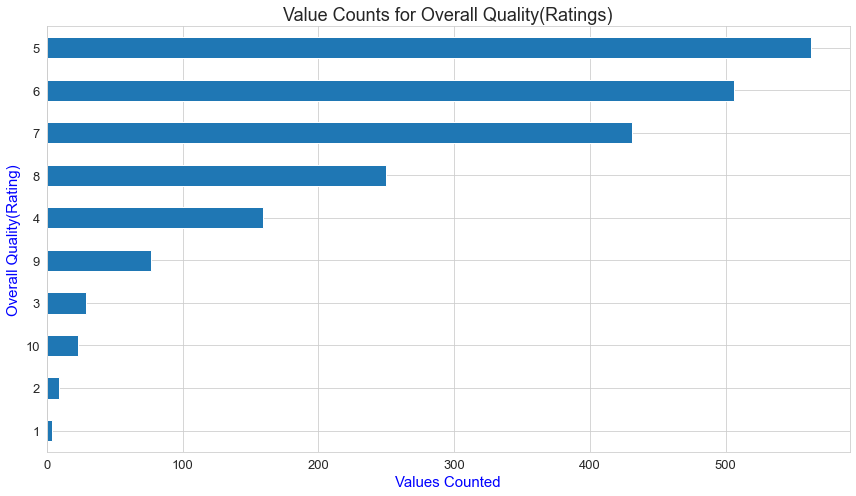

In [16]:
#Plot of value counts for Overall Quality column
plt.figure(figsize = (12,7))
plt.title('Value Counts for Overall Quality(Ratings)', fontsize = 18)
plt.yticks(fontsize = 13)
plt.ylabel('Overall Quality(Rating)',fontsize = 15, c = 'b')
plt.xticks(fontsize = 13)
plt.xlabel('Values Counted', fontsize = 15, c ='b')
train['overall_qual'].value_counts(ascending= True).plot(kind='barh');
plt.tight_layout()

The bigger frequencies reside between ratings of 5-7.

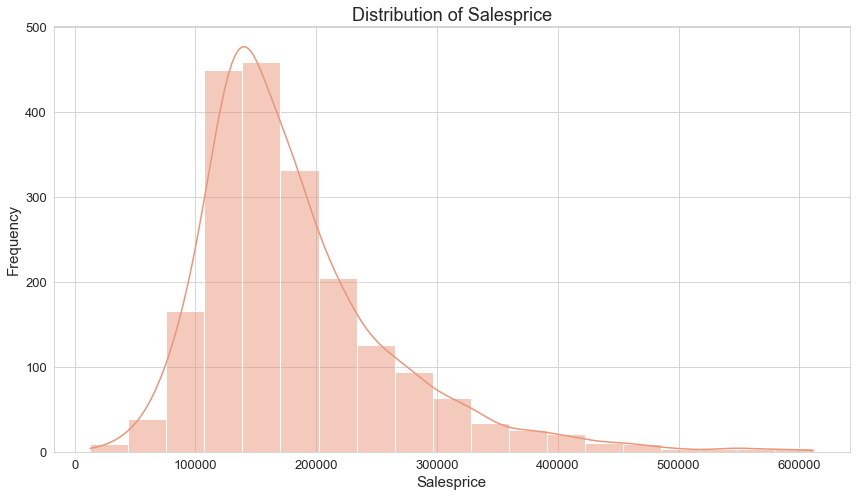

In [17]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Salesprice',fontsize = 18)
plt.xlabel('Salesprice', fontsize = 15)
plt.xticks(fontsize = 13)
plt.ylabel('Frequency', fontsize = 15)
plt.yticks(fontsize = 13)
sns.histplot(data=train, x=train['saleprice'],kde=True, bins=19, color='darksalmon');
plt.tight_layout()


Looks like most values in the data set are between 120,000 to a little under 280,000. This is also a right-skewed distribution as the long tail extends to the right as most values are show on the left side(between 90,000 & 340,000). You can also see a value of 600,000 as an outlier as well.

In [18]:
# Look at aggregate metrics for saleprice to aid the visualization 
# & make decision about outlier
train[['saleprice']].describe()

saleprice
count    2051.000000
mean   181469.701609
std     79258.659352
min     12789.000000
25%    129825.000000
50%    162500.000000
75%    214000.000000
max    611657.000000

In [19]:
#25th & 75th percentiles
saleprice_25, saleprice_75 = 129825,214000
#calculate Interquartile range
saleprice_iqr = saleprice_75 -saleprice_25
#calculate outlier Cutoff
sp_cutoff = saleprice_iqr * 1.5
#upper & lower cut off points
upper_cutoff = saleprice_75 + sp_cutoff
lower_cutoff = saleprice_25 - sp_cutoff
print(upper_cutoff, lower_cutoff)

340262.5 3562.5


In [20]:
# filter based on cutoff
sales_price_outliers = train[train['saleprice']> 340262.5]
sales_price_outliers.shape

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
68    1707  528150040           20        RL          94.0     13615   Pave   
81     367  527214050           20        RL          63.0     17423   Pave   
99    2450  528358030           60        RL          83.0     10019   Pave   
100   1013  527214030           20        RL          53.0     15401   Pave   
138   2331  527210040           60        RL          60.0     18062   Pave   
151   2333  527212030           60        RL          85.0     16056   Pave   
178   1107  528365060           60        RL          96.0     10542   Pave   
189   2334  527212040           60        RL          82.0     12438   Pave   
190   2330  527210030           60        RL          59.0     16023   Pave   
199    448  528166060           20        RL         103.0     13472   Pave   
230   1071  528180140          120        RL          65.0      8769   Pave   
270   1069  528178090           60        RL         112.0     16451   Pave   
281   1075  528186130          120        RL          89.0      8232   Pave   
286    960  916382100           20        RL         113.0     13438   Pave   
317   2332  527210050           60        RL          63.0     12292   Pave   
328   1773  528366050           20        RL           NaN     12692   Pave   
332   1060  528118090           60        RL          96.0     12539   Pave   
359   1106  528363110           20        RL          91.0     10437   Pave   
361   1701  528118040           60        RL         118.0     13654   Pave   
398     37  528108120           60        RL         102.0     12858   Pave   
465   1765  528340030           60        RL          89.0     10557   Pave   
480   1642  527256030           20        RL          85.0     14082   Pave   
488   2400  528164040           20        RL          72.0     11846   Pave   
489   1068  528178070           60        RL         130.0     16900   Pave   
498    435  528112040           20        RL          95.0     11578   Pave   
509   1054  528104080           60        RL          67.0     14948   Pave   
517   2276  921128030           20        RL          85.0     12633   Pave   
519   1178  533236090          160        FV          36.0      3951   Pave   
526   2385  528114010           20        RL         120.0     14780   Pave   
529    432  528110010           60        RL          97.0     13478   Pave   
621   1636  527210060           20        RL          86.0     14157   Pave   
623    457  528176030           20        RL         100.0     14836   Pave   
637    522  528458160           20        FV          85.0      9187   Pave   
645   1637  527212060           60        RL          98.0     12328   Pave   
682   1053  528104050           20        RL         114.0     14803   Pave   
685    514  528441090           20        RL          85.0     11128   Pave   
726   2380  528102080           60        RL          72.0     16387   Pave   
786   1861  533350020           20        RL          94.0     17778   Pave   
800   1702  528118050           20        RL          59.0     17169   Pave   
823     16  527216070           60        RL          47.0     53504   Pave   
934   1643  527256040           20        RL          81.0     13870   Pave   
940   2398  528150080           20        RL         121.0     13758   Pave   
986   1694  528106110           20        RL         105.0     15431   Pave   
998   2903  921205050           20        RL          88.0     11577   Pave   
1035  2667  902400110           75        RM          90.0     22950   Pave   
1036  2884  911370430          120        RM          41.0      5748   Pave   
1056  1710  528166150           60        RL         110.0     14277   Pave   
1058  1057  528110110           20        RL         105.0

In [21]:
train.drop(sales_price_outliers.index, inplace = True)

In [22]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4       

## Impute Nulls

In [23]:
check_nulls(train)

lot_frontage       328
garage_yr_blt      114
garage_finish      114
garage_qual        114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        20
mas_vnr_type        20
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
garage_cars          1
total_bsmt_sf        1
full_bath            0
gr_liv_area          0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
fireplaces           0
kitchen_qual         0
totrms_abvgrd        0
functional           0
2nd_flr_sf           0
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
sale_type            0
low_qual_fin_sf      0
id         

In [24]:
# impute existing nulls for columns with numerical values using iterativeimputer
iter_imp = IterativeImputer(random_state=42)
#non_object_features=[col for col in train.columns if train[col].dtype != object]
train['garage_yr_blt_imp'] = iter_imp.fit_transform(train[['garage_yr_blt']]).ravel()


In [25]:
# trial run for simple imputer
simp_imp = SimpleImputer(strategy='most_frequent')
train['garage_finish_imp'] = simp_imp.fit_transform(train[['garage_finish']]).ravel()

In [26]:

def iter_imp(data,col):
    '''
    build function to apply iterative
    imputation for nulls if not an object(eg. int/float)
    else apply simple imputation for objects with most_frequent value/mode

    '''
    if data[col].dtype != object:
        iter_imp = IterativeImputer(random_state=42)
        data[f'{col}_imp'] = iter_imp.fit_transform(data[[col]]).ravel()
        return data[[f'{col}_imp']]
    else:
        simp_imp = SimpleImputer(strategy='most_frequent')
        data[f'{col}_imp'] = simp_imp.fit_transform(data[[col]]).ravel()
        return data[f'{col}_imp']

                                                  

In [27]:
#change year built to integer/but may circle back for date_time
train['garage_yr_blt_imp'] = train['garage_yr_blt_imp'].astype(int)

In [28]:
# apply function once
iter_imp(train, 'lot_frontage')

lot_frontage_imp
0            67.893186
1            43.000000
2            68.000000
3            73.000000
4            82.000000
...                ...
2046         79.000000
2047         67.893186
2048         57.000000
2049         80.000000
2050         60.000000

[1957 rows x 1 columns]

In [29]:
# format this so that it resembles original formatting
train['lot_frontage_imp']=round(train['lot_frontage_imp'],1)

In [30]:
# drop the trial run columns
train.drop(columns = ['lot_frontage','garage_yr_blt','garage_finish'],inplace=True)

In [31]:
# list of remaining null columns with over 50 null values left
# less than 5 percent of overall data set
nulls_list = ['garage_qual', 'garage_cond','garage_type',
              'bsmt_exposure','bsmtfin_type_2','bsmt_qual',
              'bsmt_cond','bsmtfin_type_1']

In [32]:
# apply function to all those columns
[iter_imp(train,n) for n in nulls_list]

[0       TA
 1       TA
 2       TA
 3       TA
 4       TA
         ..
 2046    TA
 2047    TA
 2048    Fa
 2049    TA
 2050    TA
 Name: garage_qual_imp, Length: 1957, dtype: object,
 0       TA
 1       TA
 2       TA
 3       TA
 4       TA
         ..
 2046    TA
 2047    TA
 2048    Fa
 2049    TA
 2050    TA
 Name: garage_cond_imp, Length: 1957, dtype: object,
 0        Attchd
 1        Attchd
 2        Detchd
 3       BuiltIn
 4        Detchd
          ...   
 2046     Attchd
 2047     Detchd
 2048     Detchd
 2049     Attchd
 2050     Attchd
 Name: garage_type_imp, Length: 1957, dtype: object,
 0       No
 1       No
 2       No
 3       No
 4       No
         ..
 2046    Av
 2047    No
 2048    No
 2049    No
 2050    No
 Name: bsmt_exposure_imp, Length: 1957, dtype: object,
 0       Unf
 1       Unf
 2       Unf
 3       Unf
 4       Unf
        ... 
 2046    Unf
 2047    Unf
 2048    Unf
 2049    LwQ
 2050    Unf
 Name: bsmtfin_type_2_imp, Length: 1957, dtype: object,
 0  

In [33]:
train.head()

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4

In [35]:
# drop columns in null_list
train.drop(columns = nulls_list,inplace=True)

In [36]:
check_nulls(train)

mas_vnr_area          20
mas_vnr_type          20
bsmt_half_bath         2
bsmt_full_bath         2
bsmtfin_sf_1           1
total_bsmt_sf          1
garage_area            1
garage_cars            1
bsmtfin_sf_2           1
bsmt_unf_sf            1
open_porch_sf          0
functional             0
kitchen_abvgr          0
fireplaces             0
totrms_abvgrd          0
kitchen_qual           0
half_bath              0
full_bath              0
paved_drive            0
wood_deck_sf           0
bedroom_abvgr          0
id                     0
3ssn_porch             0
lot_frontage_imp       0
bsmt_cond_imp          0
bsmt_qual_imp          0
bsmtfin_type_2_imp     0
bsmt_exposure_imp      0
garage_type_imp        0
garage_cond_imp        0
garage_qual_imp        0
garage_finish_imp      0
screen_porch           0
garage_yr_blt_imp      0
saleprice              0
sale_type              0
yr_sold                0
mo_sold                0
misc_val               0
pool_area              0


In [37]:
# drop rows for columns with about 20 values or less/ less than 1% data set
train.dropna(inplace=True)

In [38]:
check_nulls(train)

id                    0
totrms_abvgrd         0
open_porch_sf         0
wood_deck_sf          0
paved_drive           0
garage_area           0
garage_cars           0
fireplaces            0
functional            0
kitchen_qual          0
pid                   0
kitchen_abvgr         0
bedroom_abvgr         0
half_bath             0
full_bath             0
bsmt_half_bath        0
bsmt_full_bath        0
gr_liv_area           0
enclosed_porch        0
3ssn_porch            0
screen_porch          0
pool_area             0
bsmt_cond_imp         0
bsmt_qual_imp         0
bsmtfin_type_2_imp    0
bsmt_exposure_imp     0
garage_type_imp       0
garage_cond_imp       0
garage_qual_imp       0
lot_frontage_imp      0
garage_finish_imp     0
garage_yr_blt_imp     0
saleprice             0
sale_type             0
yr_sold               0
mo_sold               0
misc_val              0
low_qual_fin_sf       0
2nd_flr_sf            0
1st_flr_sf            0
year_built            0
overall_qual    

In [39]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

saleprice
saleprice           1.000000
overall_qual        0.786438
gr_liv_area         0.653310
garage_cars         0.623667
garage_area         0.607328
year_built          0.599991
year_remod/add      0.571053
total_bsmt_sf       0.554973
full_bath           0.554338
1st_flr_sf          0.539166
garage_yr_blt_imp   0.524735
fireplaces          0.470078
totrms_abvgrd       0.434886
mas_vnr_area        0.357422
bsmtfin_sf_1        0.354933
open_porch_sf       0.323226
wood_deck_sf        0.302587
lot_frontage_imp    0.272231
half_bath           0.266317
2nd_flr_sf          0.265520
bsmt_full_bath      0.259785
lot_area            0.251367
bsmt_unf_sf         0.171955
bedroom_abvgr       0.152113
screen_porch        0.097019
3ssn_porch          0.055951
pool_area           0.044581
mo_sold             0.022916
bsmtfin_sf_2        0.018634
misc_val            0.008283
yr_sold            -0.000971
bsmt_half_bath     -0.018064
id                 -0.048387
ms_subclass        -0.051275
overall_cond       -0.053767
low_qual_fin_sf    -0.065684
kitchen_abvgr      -0.131935
enclosed_porch     -0.149142
pid                -0.208634

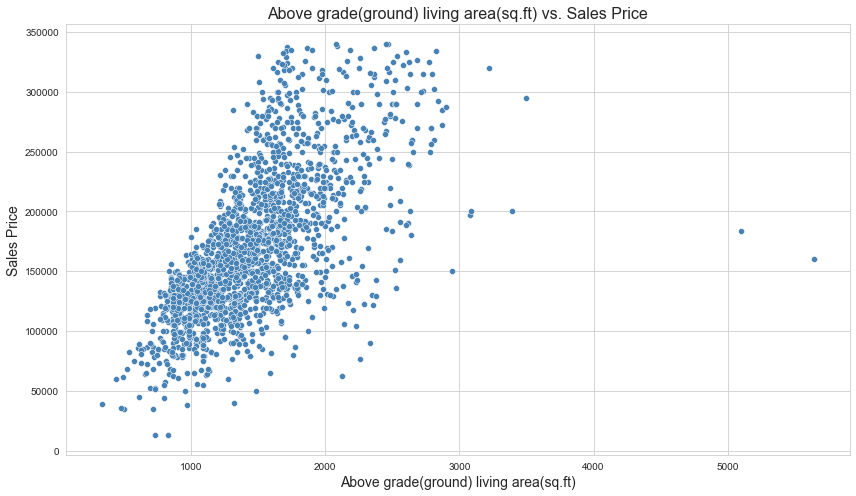

In [40]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train,x=train['gr_liv_area'], y=train['saleprice'],color='steelblue');
plt.tight_layout()

In [41]:
def outlier_selector(data,cols):
    '''
    data is the data frame
    cols is the corresponding column(str)
    applies techniques to find 25th & 75th percentiles
    calculate the IQR
    Provide lower and upper cutoff points
    '''
    print(data[cols].describe())
#25th & 75th percentiles
    saleprice_25 = np.percentile(data[cols],25)
    saleprice_75 = np.percentile(data[cols],75)
#calculate Interquartile range
    saleprice_iqr = saleprice_75 - saleprice_25
#calculate outlier Cutoff
    sp_cutoff = saleprice_iqr * 1.5
#upper & lower cut off points
    upper_cutoff = saleprice_75 + sp_cutoff
    lower_cutoff = saleprice_25 - sp_cutoff
    outliers = data[data[cols] > upper_cutoff]
    data.drop(outliers.index, inplace = True)
    return(f'upper cutoff: {upper_cutoff}, lower cutoff: {lower_cutoff}')
    

In [42]:
outlier_selector(train,'gr_liv_area')

count    1934.000000
mean     1454.634436
std       459.375938
min       334.000000
25%      1114.000000
50%      1419.000000
75%      1689.000000
max      5642.000000
Name: gr_liv_area, dtype: float64


'upper cutoff: 2551.5, lower cutoff: 251.5'

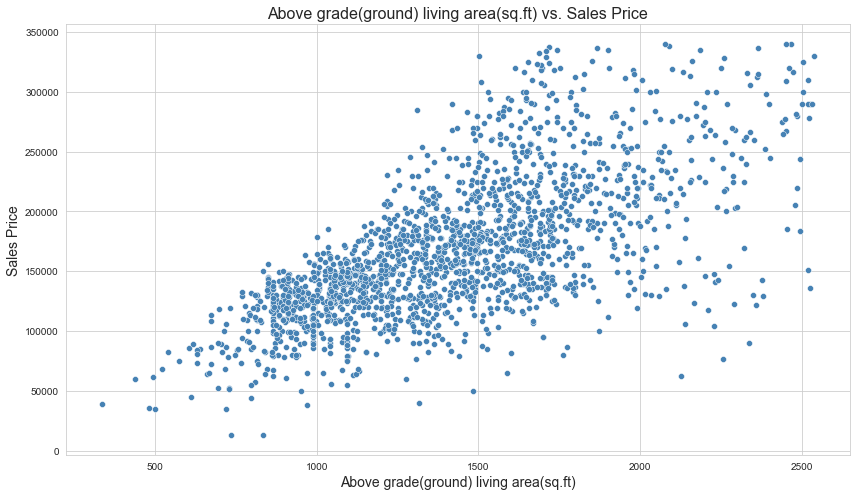

In [43]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train,x=train['gr_liv_area'], y=train['saleprice'],color='steelblue');
plt.tight_layout()

In [44]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

saleprice
saleprice           1.000000
overall_qual        0.793205
gr_liv_area         0.667518
garage_cars         0.623645
year_built          0.623426
garage_area         0.606708
total_bsmt_sf       0.595515
year_remod/add      0.581020
1st_flr_sf          0.561945
full_bath           0.542426
garage_yr_blt_imp   0.533053
fireplaces          0.454811
totrms_abvgrd       0.409558
bsmtfin_sf_1        0.377668
mas_vnr_area        0.364674
open_porch_sf       0.316917
wood_deck_sf        0.289156
lot_frontage_imp    0.273833
bsmt_full_bath      0.262146
lot_area            0.254871
half_bath           0.242377
2nd_flr_sf          0.209833
bsmt_unf_sf         0.177729
bedroom_abvgr       0.114591
screen_porch        0.085479
3ssn_porch          0.062000
pool_area           0.019156
mo_sold             0.013551
bsmtfin_sf_2        0.001731
misc_val            0.001393
yr_sold            -0.000384
bsmt_half_bath     -0.030333
id                 -0.048765
ms_subclass        -0.059393
overall_cond       -0.060878
low_qual_fin_sf    -0.080043
kitchen_abvgr      -0.145207
enclosed_porch     -0.157956
pid                -0.209372

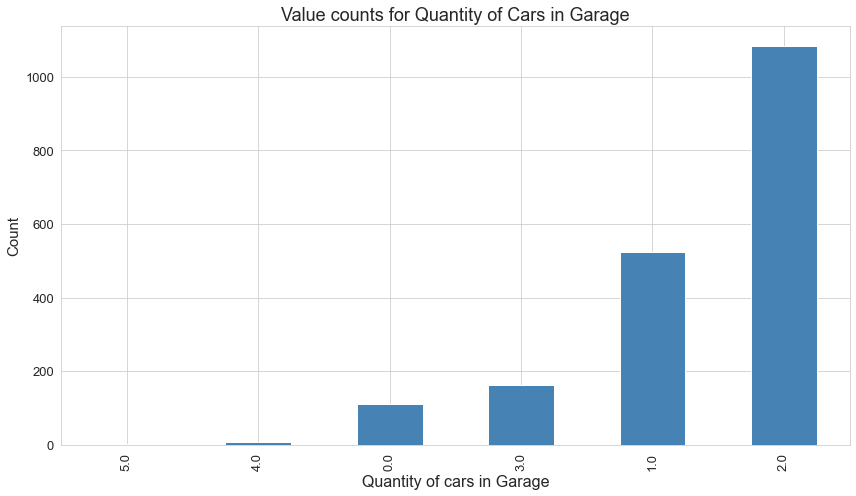

In [45]:
plt.figure(figsize = (12,7))
plt.title('Value counts for Quantity of Cars in Garage', fontsize = 18)
plt.xlabel('Quantity of cars in Garage', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 15)
plt.yticks(fontsize = 13)
train['garage_cars'].value_counts().sort_values(ascending=True).plot(kind = 'bar', color ='steelblue')
plt.tight_layout();

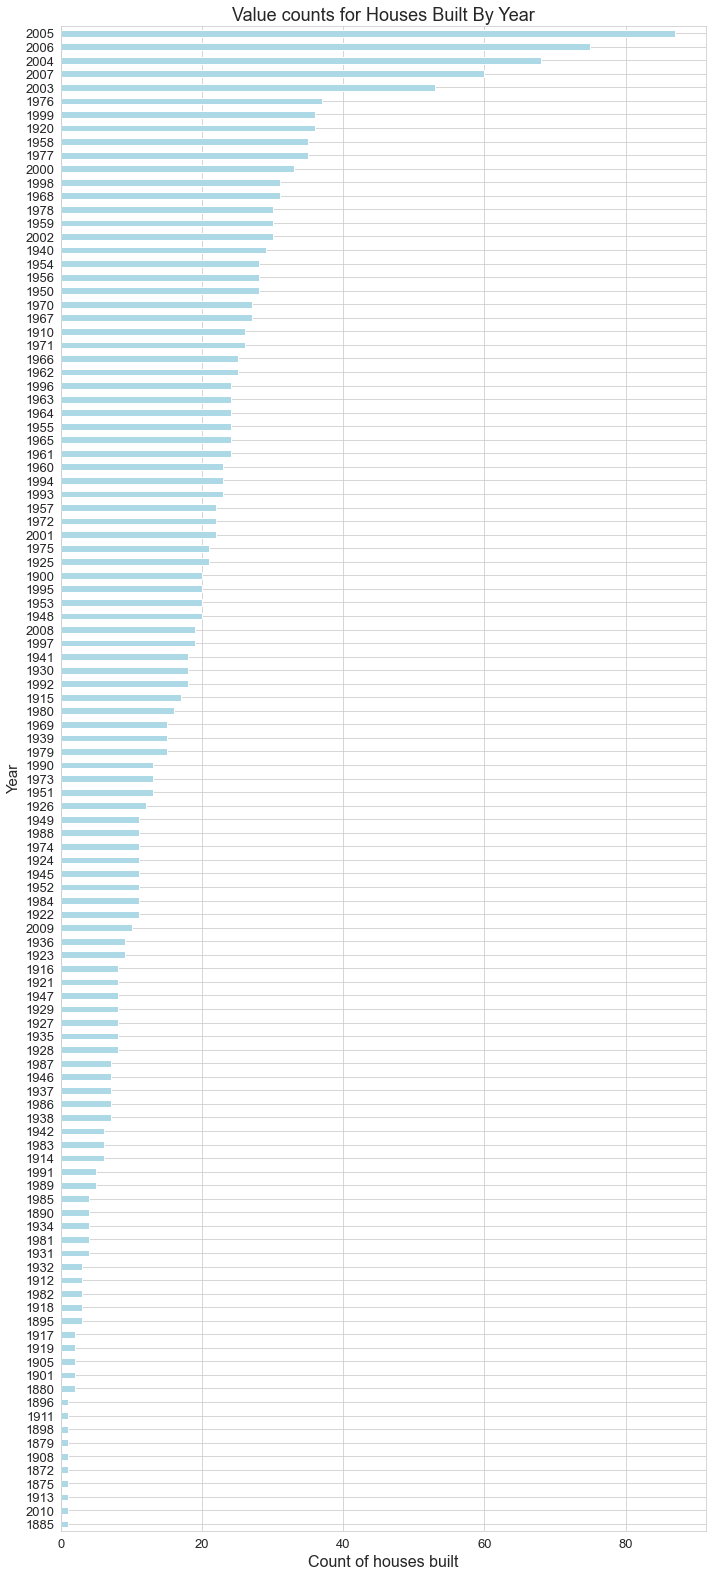

In [46]:
plt.figure(figsize = (10,22))
plt.title('Value counts for Houses Built By Year', fontsize = 18)
plt.xlabel('Count of houses built', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize = 13)
train['year_built'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color ='lightblue')
plt.tight_layout();


It looks like 2003 through 2007 is the period by which the large amount of development in terms of building houses occurred.  

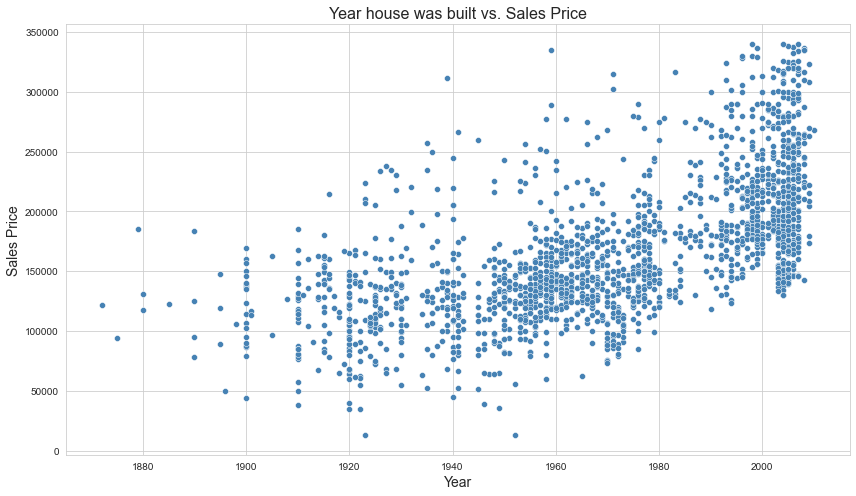

In [47]:
plt.figure(figsize = (12,7))
plt.title('Year house was built vs. Sales Price',fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Sales Price', fontsize = 14)
sns.scatterplot(data= train,x=train['year_built'],
                y=train['saleprice'],color='steelblue');
plt.tight_layout()

Also worth noting that houses built more recently have fetched a higher sales price.

In [48]:
train['total_sf']=train['total_bsmt_sf']+ train['1st_flr_sf'] + train['2nd_flr_sf'] + train['open_porch_sf'] + train['wood_deck_sf']

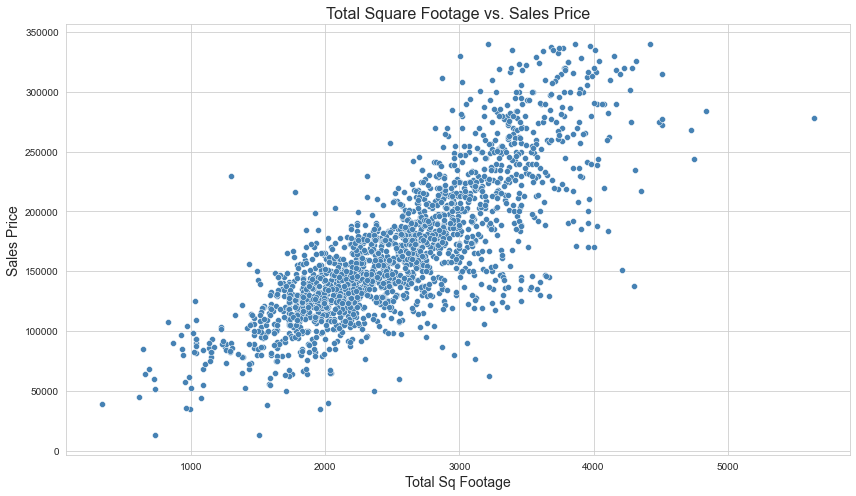

In [49]:
plt.figure(figsize = (12,7))
plt.title('Total Square Footage vs. Sales Price',fontsize = 16)
plt.xlabel('Total Sq Footage', fontsize = 14)
plt.ylabel('Sales Price', fontsize = 14)
sns.scatterplot(data= train,x=train['total_sf'],
                y=train['saleprice'],color='steelblue');
plt.tight_layout()

### Ordinal encoding

Focus on ordinal columns and transform them.  That is those columns whose categories have a rank value. 

In [50]:
#Using data dictionary along with this will select ordinal features
train.dtypes

id                      int64
pid                     int64
ms_subclass             int64
ms_zoning              object
lot_area                int64
street                 object
lot_shape              object
land_contour           object
utilities              object
lot_config             object
land_slope             object
neighborhood           object
condition_1            object
condition_2            object
bldg_type              object
house_style            object
overall_qual            int64
overall_cond            int64
year_built              int64
year_remod/add          int64
roof_style             object
roof_matl              object
exterior_1st           object
exterior_2nd           object
mas_vnr_type           object
mas_vnr_area          float64
exter_qual             object
exter_cond             object
foundation             object
bsmtfin_sf_1          float64
bsmtfin_sf_2          float64
bsmt_unf_sf           float64
total_bsmt_sf         float64
heating   

In [51]:
train['heating_qc'].value_counts()

Ex    928
TA    584
Gd    307
Fa     66
Po      3
Name: heating_qc, dtype: int64

In [52]:
oe_heatqc = OrdinalEncoder(categories=[['Po','Fa','Gd','TA','Ex']])

In [53]:
train['heating_qc_oe']= oe_heatqc.fit_transform(train[['heating_qc']])

In [54]:
train.head()

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4             0.0          2          0              3              1   

  kitchen_qual  totrms_abvgrd functional  fireplaces  garage_cars  \
0           Gd              6        Typ           0          2.0   
1           Gd              8        Typ           1          2.0   
2           Gd              5        Typ           0          1.0   
3           TA              7        Typ           0          2.0 

In [55]:
train.drop(columns= 'heating_qc', inplace= True)

In [56]:
np.unique(train['kitchen_qual'].values)

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [57]:
train['kitchen_qual'].value_counts()

TA    1031
Gd     734
Ex      77
Fa      46
Name: kitchen_qual, dtype: int64

In [58]:
def one_hot_transform(data,col,category_list):
    '''
    data-dataframe, col-column, category_list-list of categories for col
    transform these columns using ordinal encoder
    drop the original column 
    '''
    oe = OrdinalEncoder(categories=[category_list])
    data[f'{col}_oe'] = oe.fit_transform(data[[col]])
    data.drop(columns = col, inplace = True)#added as part of workflow
    return data.head()

In [59]:
one_hot_transform(train,'kitchen_qual',['Fa','Gd','TA','Ex'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0  

In [143]:
def corr_to_target(data, col):
    '''
    allows to check for correlation to a column quickly
    data should be dataframe
    col is the column/target for which all features are correlated with
    '''
    return data.corr()[[col]].sort_values(by= col , ascending=False)

In [61]:
# get list of unique values for a column
def unique_vals_col(data,col):
    return np.unique(data[col].values)

In [62]:
# testing out unique values from a column function
unique_vals_col(train, 'bsmt_qual_imp')

array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)

In [63]:
one_hot_transform(train,'bsmt_qual_imp',['Po','Fa','Gd','TA','Ex'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0  

In [64]:
unique_vals_col(train,'land_slope')

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [65]:
one_hot_transform(train,'land_slope',['Sev','Mod','Gtl'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config neighborhood condition_1 condition_2  \
0          Lvl    AllPub    CulDSac       Sawyer        RRAe        Norm   
1          Lvl    AllPub    CulDSac      SawyerW        Norm        Norm   
2          Lvl    AllPub     Inside        NAmes        Norm        Norm   
3          Lvl    AllPub     Inside       Timber        Norm        Norm   
4          Lvl    AllPub     Inside      SawyerW        Norm        Norm   

  bldg_type house_style  overall_qual  overall_cond  year_built  \
0      1Fam      2Story             6             8        1976   
1      1Fam      2Story             7             5        1996   
2      1Fam      1Story             5             7        1953   
3      1Fam      2Story             5             5        2006   
4      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0   
3        Typ           0          2.0        400.0           Y  

In [66]:
unique_vals_col(train,'lot_shape')

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [67]:
one_hot_transform(train,'lot_shape',['IR3','IR2','IR1','Reg'])

id        pid  ms_subclass ms_zoning  lot_area street land_contour  \
0  109  533352170           60        RL     13517   Pave          Lvl   
1  544  531379050           60        RL     11492   Pave          Lvl   
2  153  535304180           20        RL      7922   Pave          Lvl   
3  318  916386060           60        RL      9802   Pave          Lvl   
4  255  906425045           50        RL     14235   Pave          Lvl   

  utilities lot_config neighborhood condition_1 condition_2 bldg_type  \
0    AllPub    CulDSac       Sawyer        RRAe        Norm      1Fam   
1    AllPub    CulDSac      SawyerW        Norm        Norm      1Fam   
2    AllPub     Inside        NAmes        Norm        Norm      1Fam   
3    AllPub     Inside       Timber        Norm        Norm      1Fam   
4    AllPub     Inside      SawyerW        Norm        Norm      1Fam   

  house_style  overall_qual  overall_cond  year_built  year_remod/add  \
0      2Story             6             8        1976            2005   
1      2Story             7             5        1996            1997   
2      1Story             5             7        1953            2007   
3      2Story             5             5        2006            2007   
4      1.5Fin             6             8        1900            1993   

  roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  \
0      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0   
2      Gable   CompShg      VinylSd      VinylSd         None           0.0   
3      Gable   CompShg      VinylSd      VinylSd         None           0.0   
4      Gable   CompShg      Wd Sdng      Plywood         None           0.0   

  exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0         Gd         TA     CBlock         533.0           0.0        192.0   
1         Gd         TA      PConc         637.0           0.0        276.0   
2         TA         Gd     CBlock         731.0           0.0        326.0   
3         TA         TA      PConc           0.0           0.0        384.0   
4         TA         TA      PConc           0.0           0.0        676.0   

   total_bsmt_sf heating central_air electrical  1st_flr_sf  2nd_flr_sf  \
0          725.0    GasA           Y      SBrkr         725         754   
1          913.0    GasA           Y      SBrkr         913        1209   
2         1057.0    GasA           Y      SBrkr        1057           0   
3          384.0    GasA           Y      SBrkr         744         700   
4          676.0    GasA           Y      SBrkr         831         614   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd functional  \
0          1              3              1              6        Typ   
1          1              4              1              8        Typ   
2          0              3              1              5        Typ   
3          1              3              1              7        Typ   
4          0              3              1              6        Typ   

   fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0           0          2.0        475.0           Y             0   
1           1          2.0        559.0           Y             0   
2           0          1.0        246.0           Y             0   
3           0          2.0        400.0           Y           100   
4           0          2.0       

In [68]:
unique_vals_col(train,'functional')

array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'],
      dtype=object)

In [69]:
one_hot_transform(train,'functional',['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])

id        pid  ms_subclass ms_zoning  lot_area street land_contour  \
0  109  533352170           60        RL     13517   Pave          Lvl   
1  544  531379050           60        RL     11492   Pave          Lvl   
2  153  535304180           20        RL      7922   Pave          Lvl   
3  318  916386060           60        RL      9802   Pave          Lvl   
4  255  906425045           50        RL     14235   Pave          Lvl   

  utilities lot_config neighborhood condition_1 condition_2 bldg_type  \
0    AllPub    CulDSac       Sawyer        RRAe        Norm      1Fam   
1    AllPub    CulDSac      SawyerW        Norm        Norm      1Fam   
2    AllPub     Inside        NAmes        Norm        Norm      1Fam   
3    AllPub     Inside       Timber        Norm        Norm      1Fam   
4    AllPub     Inside      SawyerW        Norm        Norm      1Fam   

  house_style  overall_qual  overall_cond  year_built  year_remod/add  \
0      2Story             6             8        1976            2005   
1      2Story             7             5        1996            1997   
2      1Story             5             7        1953            2007   
3      2Story             5             5        2006            2007   
4      1.5Fin             6             8        1900            1993   

  roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  \
0      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0   
2      Gable   CompShg      VinylSd      VinylSd         None           0.0   
3      Gable   CompShg      VinylSd      VinylSd         None           0.0   
4      Gable   CompShg      Wd Sdng      Plywood         None           0.0   

  exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0         Gd         TA     CBlock         533.0           0.0        192.0   
1         Gd         TA      PConc         637.0           0.0        276.0   
2         TA         Gd     CBlock         731.0           0.0        326.0   
3         TA         TA      PConc           0.0           0.0        384.0   
4         TA         TA      PConc           0.0           0.0        676.0   

   total_bsmt_sf heating central_air electrical  1st_flr_sf  2nd_flr_sf  \
0          725.0    GasA           Y      SBrkr         725         754   
1          913.0    GasA           Y      SBrkr         913        1209   
2         1057.0    GasA           Y      SBrkr        1057           0   
3          384.0    GasA           Y      SBrkr         744         700   
4          676.0    GasA           Y      SBrkr         831         614   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  fireplaces  \
0          1              3              1              6           0   
1          1              4              1              8           1   
2          0              3              1              5           0   
3          1              3              1              7           0   
4          0              3              1              6           0   

   garage_cars  garage_area paved_drive  wood_deck_sf  open_porch_sf  \
0          2.0        475.0           Y             0             44   
1          2.0        559.0           Y             0             74   
2          1.0        246.0           Y             0             52   
3          2.0        400.0           Y           100              0   
4          2

### Make two columns into numeric Binary values

In [70]:
# Applied lambda function to binarize these two categories.  
train['paved_drive']=train['paved_drive'].apply(lambda x:1 if x=='Y' else 0)
train['central_air']=train['central_air'].apply(lambda x:1 if x=='Y' else 0)

### Get Dummies for categorical columns

In [71]:
# get dummies applied to nominal/categorical features
train = pd.get_dummies(data= train,
               columns=['ms_subclass','ms_zoning','neighborhood','bldg_type',
                        'lot_config','house_style','roof_style','exterior_1st',
                       'exterior_2nd','mas_vnr_type','foundation'
                       ],
               drop_first=True)

### Create more features

In [72]:
train[['overall_qual']].describe()

overall_qual
count   1888.000000
mean       5.945445
std        1.305766
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000

In [73]:
train['overall_qual'].value_counts()

5     556
6     490
7     409
8     198
4     158
9      33
3      29
2       9
1       4
10      2
Name: overall_qual, dtype: int64

In [74]:
# Feature engineer a column and chose 7 since it is the 75th percentile value
train['high_qual'] = (train['overall_qual'] >= 7).astype(int)


In [75]:
#not totally lopsided/somewhat balanced
train['high_qual'].value_counts()

0    1246
1     642
Name: high_qual, dtype: int64

In [76]:
#create function in order to create features where if >=75th percentile, then 1, else 0
def feat_75_percentile(data,col):
    percentile_75 = np.percentile(data[col],75)
    data[f'high_{col}']=(data[col] >= percentile_75).astype(int)
    return data.head(3)

In [77]:
# list of numerical/ordinal columns to do these on
col_list_ft_eng = ['gr_liv_area','year_remod/add','heating_qc_oe',
                   'functional_oe','fireplaces','total_sf'] 

In [78]:
# list comprehension to execute feat_75..function on these columns in one go. 
[feat_75_percentile(train,cols) for cols in col_list_ft_eng]

[    id        pid  lot_area street land_contour utilities condition_1  \
 0  109  533352170     13517   Pave          Lvl    AllPub        RRAe   
 1  544  531379050     11492   Pave          Lvl    AllPub        Norm   
 2  153  535304180      7922   Pave          Lvl    AllPub        Norm   
 
   condition_2  overall_qual  overall_cond  year_built  year_remod/add  \
 0        Norm             6             8        1976            2005   
 1        Norm             7             5        1996            1997   
 2        Norm             5             7        1953            2007   
 
   roof_matl  mas_vnr_area exter_qual exter_cond  bsmtfin_sf_1  bsmtfin_sf_2  \
 0   CompShg         289.0         Gd         TA         533.0           0.0   
 1   CompShg         132.0         Gd         TA         637.0           0.0   
 2   CompShg           0.0         TA         Gd         731.0           0.0   
 
    bsmt_unf_sf  total_bsmt_sf heating  central_air electrical  1st_flr_sf  \
 0  

In [79]:
#Rename columns to more accurately communicate what column does.
rename_dict = {'high_gr_liv_area':'best_gr_live_area', 'high_year_remod/add':'recent_remodel',
              'high_heating_qc_oe':'heatqc_is_ex', 'high_functional_oe':'is_typ_funct',
               'high_fireplaces':'has_fireplaces','high_total_sf':'massive_sf'}
train.rename(columns = rename_dict,inplace = True)

In [80]:
corr_to_target(train,'saleprice')

saleprice
saleprice           1.000000
total_sf            0.799209
overall_qual        0.793205
high_qual           0.680828
gr_liv_area         0.667518
...                      ...
ms_subclass_30     -0.296803
lot_shape_oe       -0.317207
ms_zoning_RM       -0.324096
foundation_CBlock  -0.337838
mas_vnr_type_None  -0.386626

[158 rows x 1 columns]

### Feature selection

In [81]:
# grab list of columns with correlations higher than . 3
corr_df = train.corr()[['saleprice']] > (.3)
corr_col_list = corr_df[corr_df['saleprice']==True].index
corr_col_list = [col for col in corr_col_list]
corr_col_list

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'central_air',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'paved_drive',
 'open_porch_sf',
 'saleprice',
 'garage_yr_blt_imp',
 'total_sf',
 'heating_qc_oe',
 'ms_subclass_60',
 'neighborhood_NridgHt',
 'exterior_1st_VinylSd',
 'exterior_2nd_VinylSd',
 'foundation_PConc',
 'high_qual',
 'best_gr_live_area',
 'recent_remodel',
 'heatqc_is_ex',
 'has_fireplaces',
 'massive_sf']

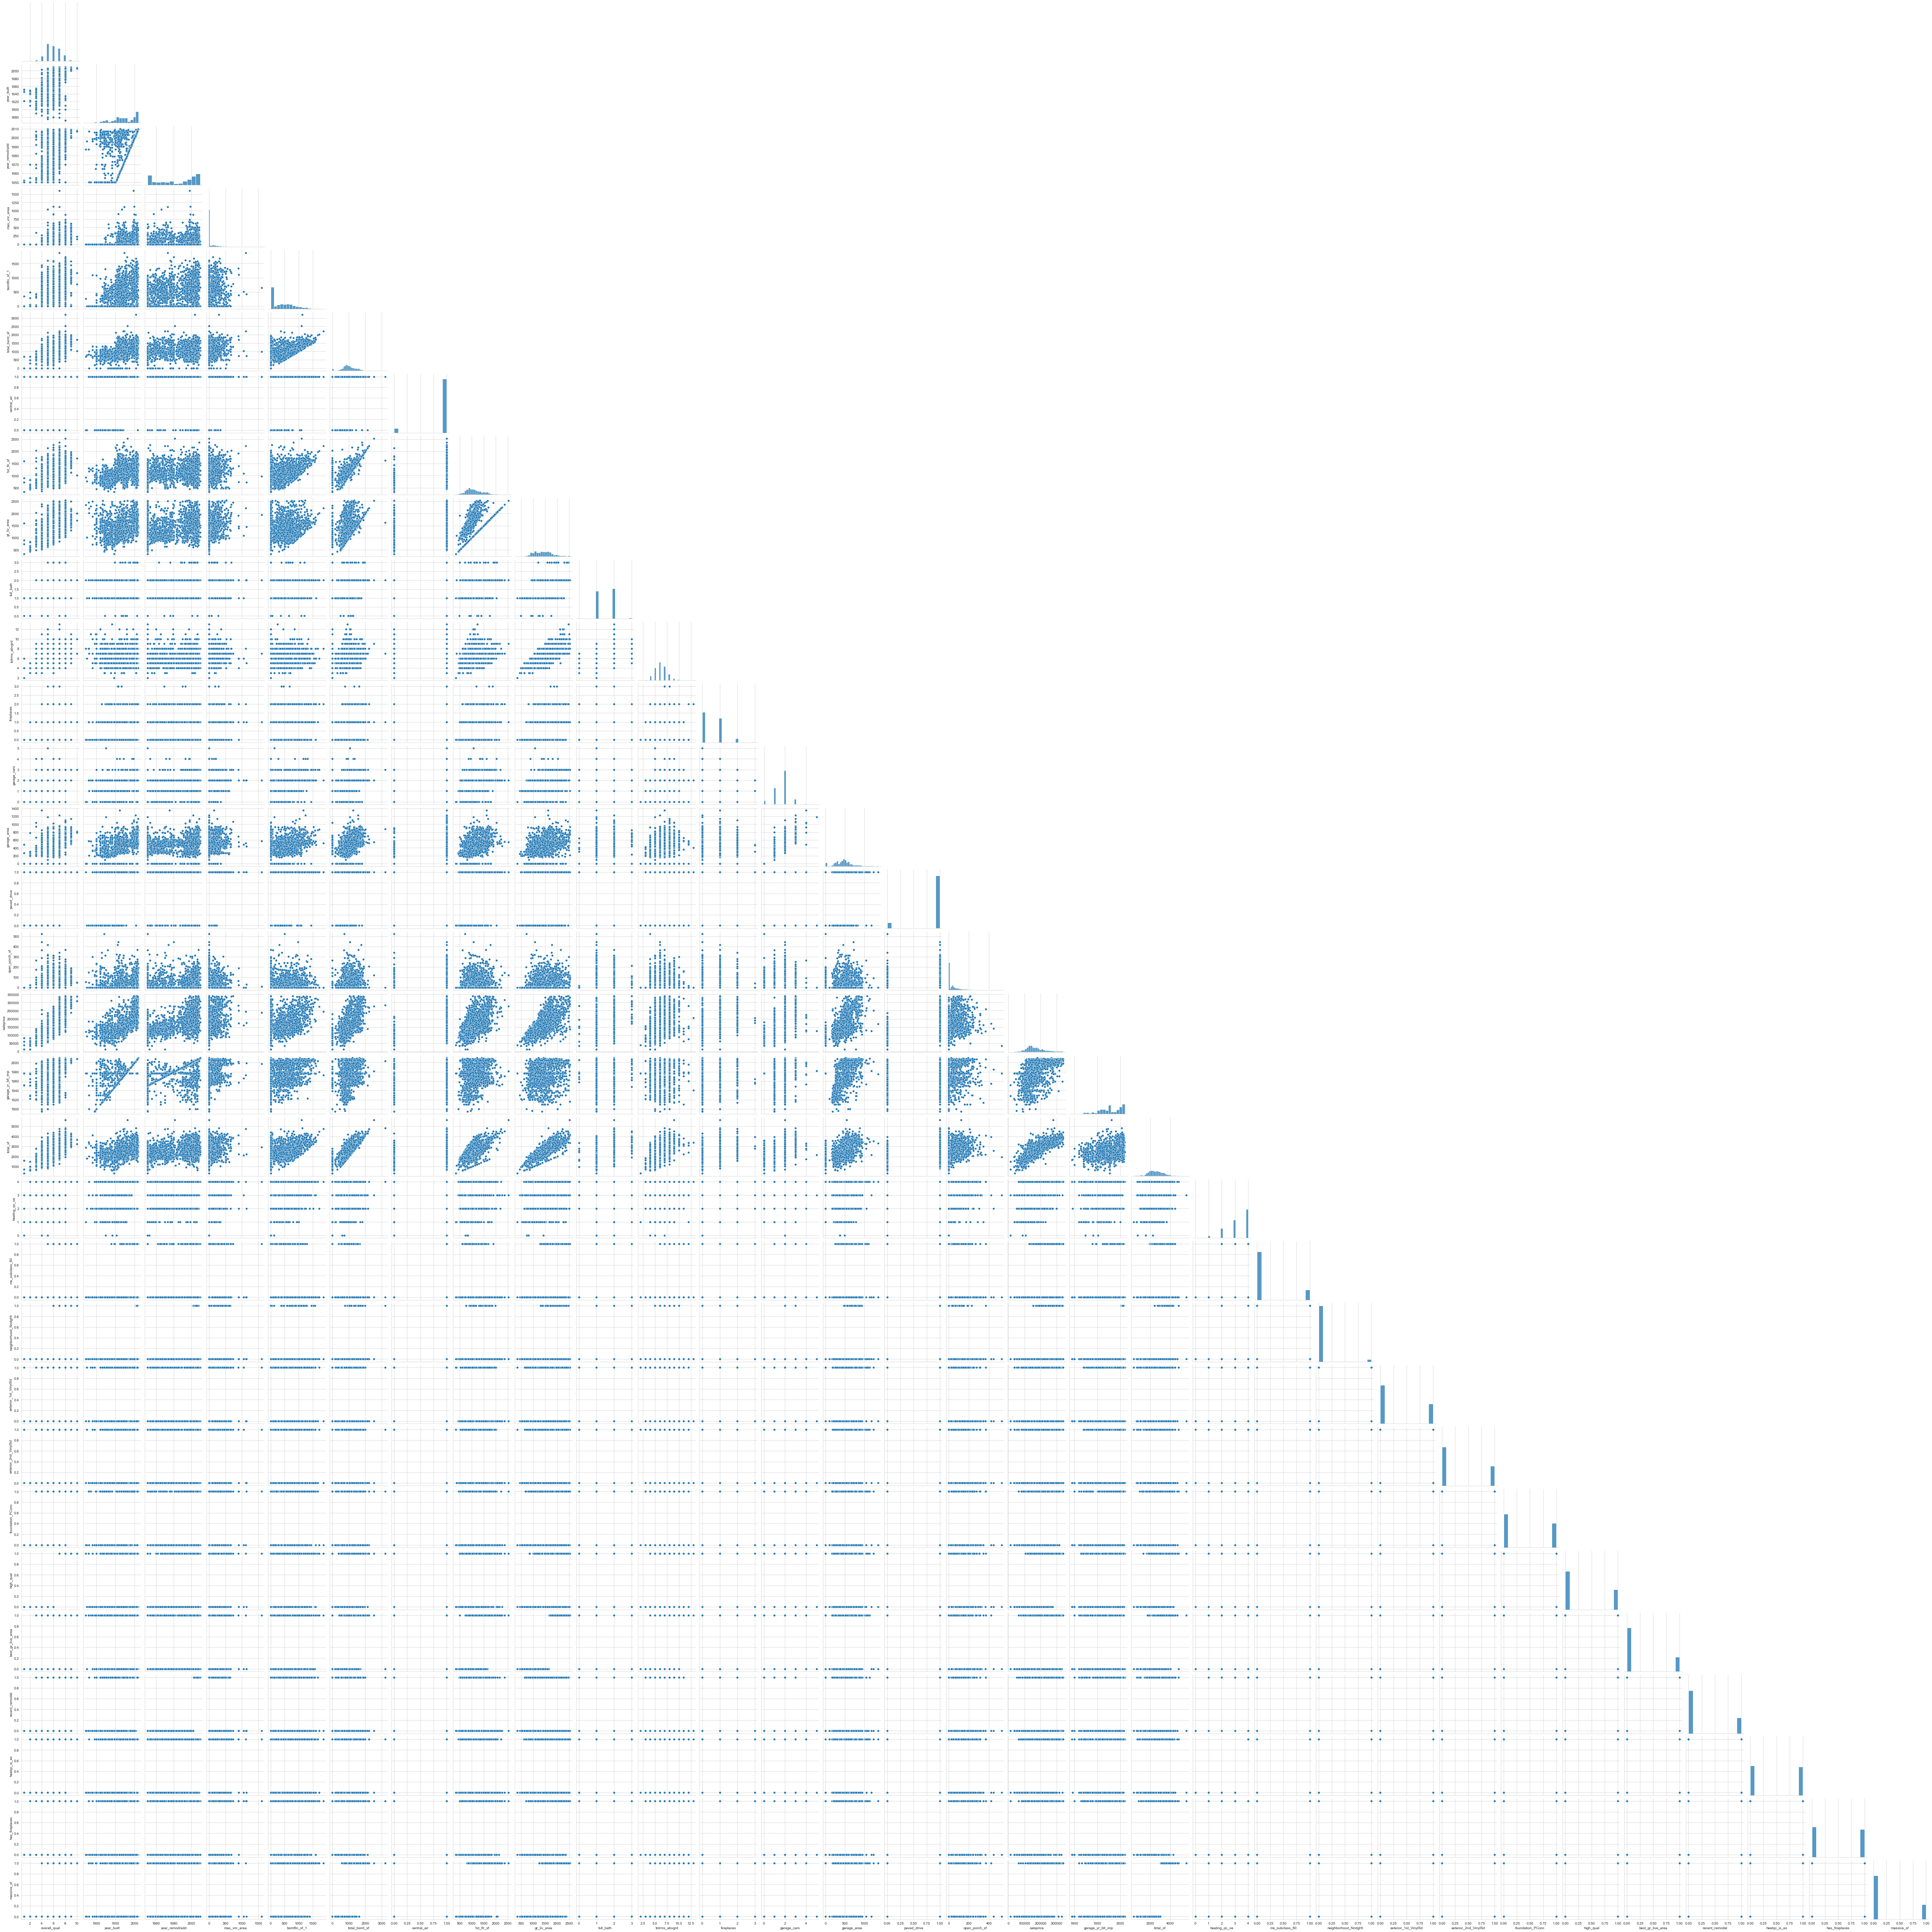

In [83]:
sns.pairplot(train[corr_col_list],corner=True);

In [84]:
new_train = pd.DataFrame(train, columns=corr_col_list)
new_train.head()

overall_qual  year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  \
0             6        1976            2005         289.0         533.0   
1             7        1996            1997         132.0         637.0   
2             5        1953            2007           0.0         731.0   
3             5        2006            2007           0.0           0.0   
4             6        1900            1993           0.0           0.0   

   total_bsmt_sf  central_air  1st_flr_sf  gr_liv_area  full_bath  \
0          725.0            1         725         1479          2   
1          913.0            1         913         2122          2   
2         1057.0            1        1057         1057          1   
3          384.0            1         744         1444          2   
4          676.0            1         831         1445          2   

   totrms_abvgrd  fireplaces  garage_cars  garage_area  paved_drive  \
0              6           0          2.0        475.0            1   
1              8           1          2.0        559.0            1   
2              5           0          1.0        246.0            1   
3              7           0          2.0        400.0            1   
4              6           0          2.0        484.0            0   

   open_porch_sf  saleprice  garage_yr_blt_imp  total_sf  heating_qc_oe  \
0             44     130500               1976    2248.0            4.0   
1             74     220000               1997    3109.0            4.0   
2             52     109000               1953    2166.0            3.0   
3              0     174000               2007    1928.0            2.0   
4             59     138500               1957    2180.0            3.0   

   ms_subclass_60  neighborhood_NridgHt  exterior_1st_VinylSd  \
0               1                     0                     0   
1               1                     0                     1   
2               0                     0                     1   
3               1                     0                     1   
4               0                     0                     0   

   exterior_2nd_VinylSd  foundation_PConc  high_qual  best_gr_live_area  \
0                     0                 0          0                  0   
1                     1                 1          1                  1   
2                     1                 0          0                  0   
3                     1                 1          0                  0   
4                     0                 1          0                  0   

   recent_remodel  heatqc_is_ex  has_fireplaces  massive_sf  
0               1             1               0           0  
1               0             1               1           1  
2               1             0               0           0  
3               1             0               0           0  
4               0             0               0           0

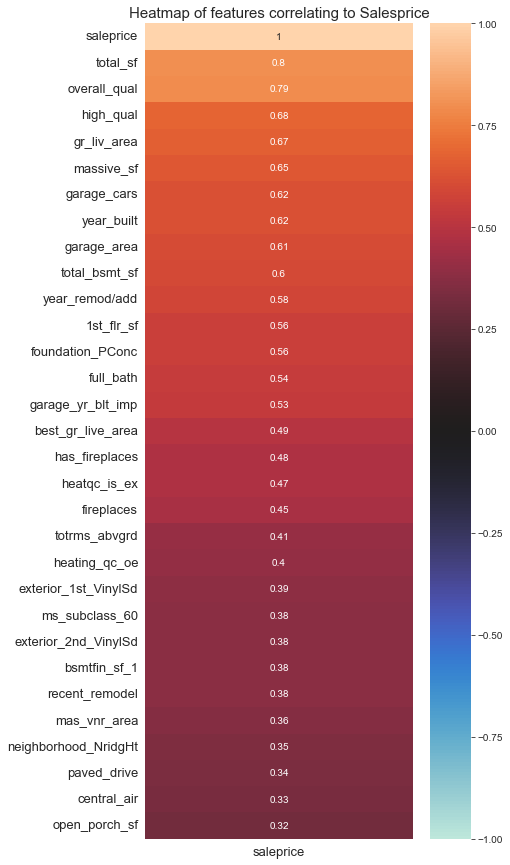

In [85]:
plt.figure(figsize=(6,15))
plt.title('Heatmap of features correlating to Salesprice', fontsize = 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize =13)
sns.heatmap(corr_to_target(new_train,'saleprice'),
            cmap='icefire',annot = True, vmin = -1, vmax = 1);

In [86]:
new_train[['exterior_1st_VinylSd']].value_counts()

exterior_1st_VinylSd
0                       1248
1                        640
dtype: int64

In [87]:
new_train[['exterior_2nd_VinylSd']].value_counts()

exterior_2nd_VinylSd
0                       1252
1                        636
dtype: int64

In [88]:
new_train['both_exterior_VynilSd'] = ((new_train['exterior_1st_VinylSd'] == 1) & (new_train['exterior_2nd_VinylSd'] == 1)).astype(int)

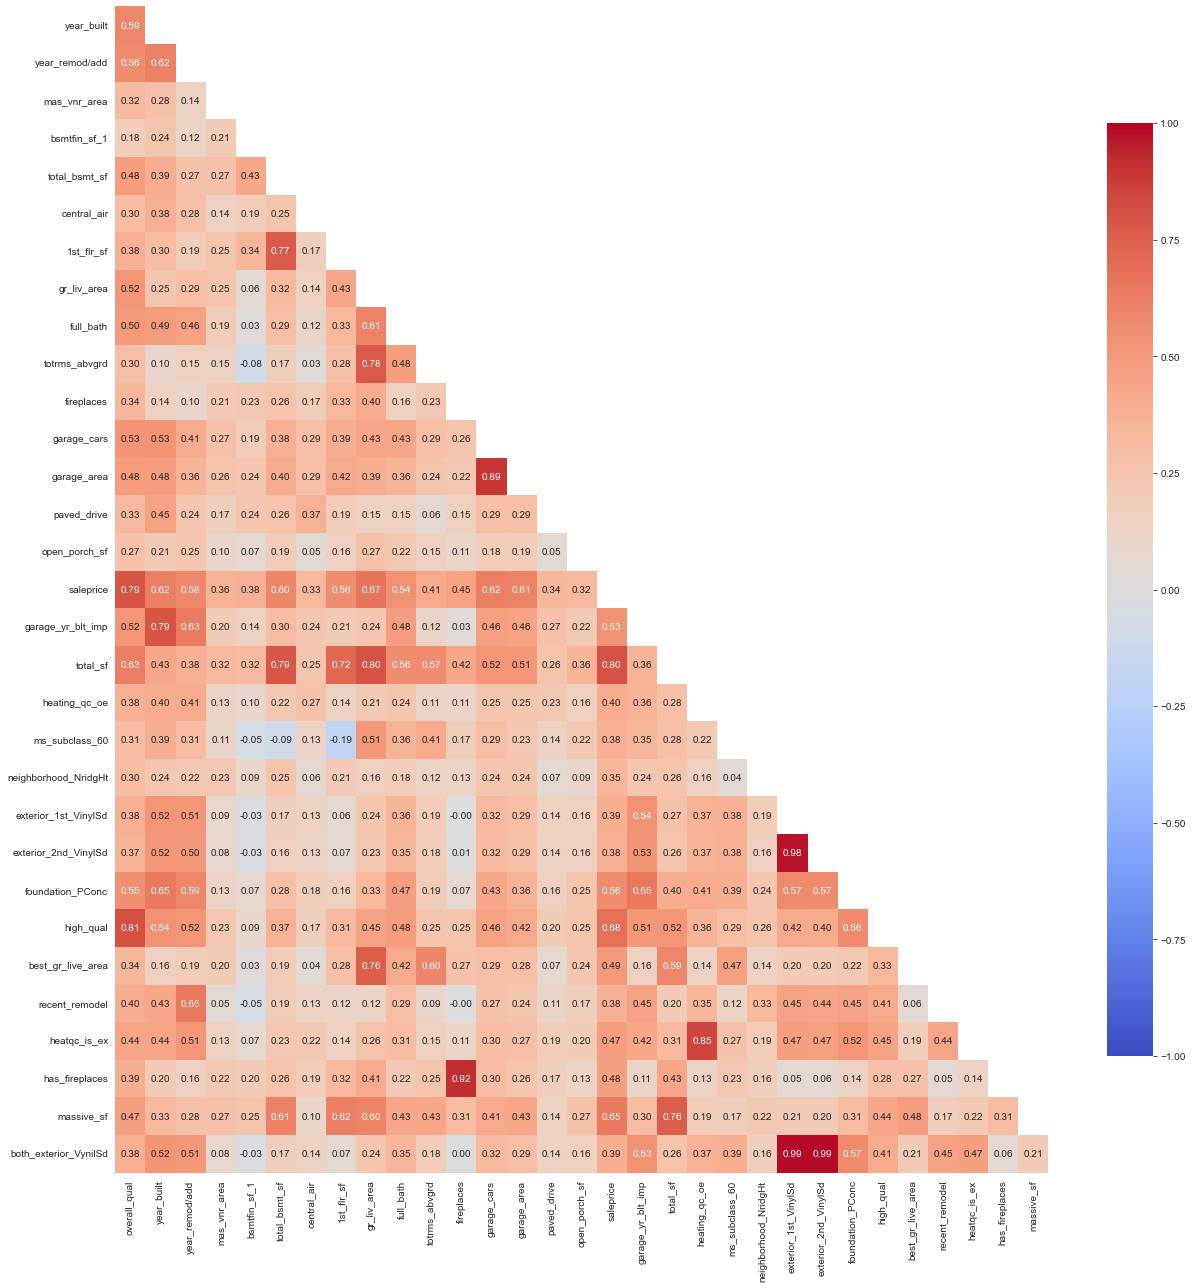

In [89]:
new_train_corr = new_train.corr()
mask = np.triu(np.ones_like(new_train_corr, dtype='bool'))
# adjust mask and df
mask = mask[1:, :-1]
corr = new_train_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Get rid of features with correlation over .90 in order to minimize the multicollinearity between features.

In [90]:
new_train.drop(columns=['garage_area','exterior_1st_VinylSd','exterior_2nd_VinylSd','fireplaces'],inplace=True)

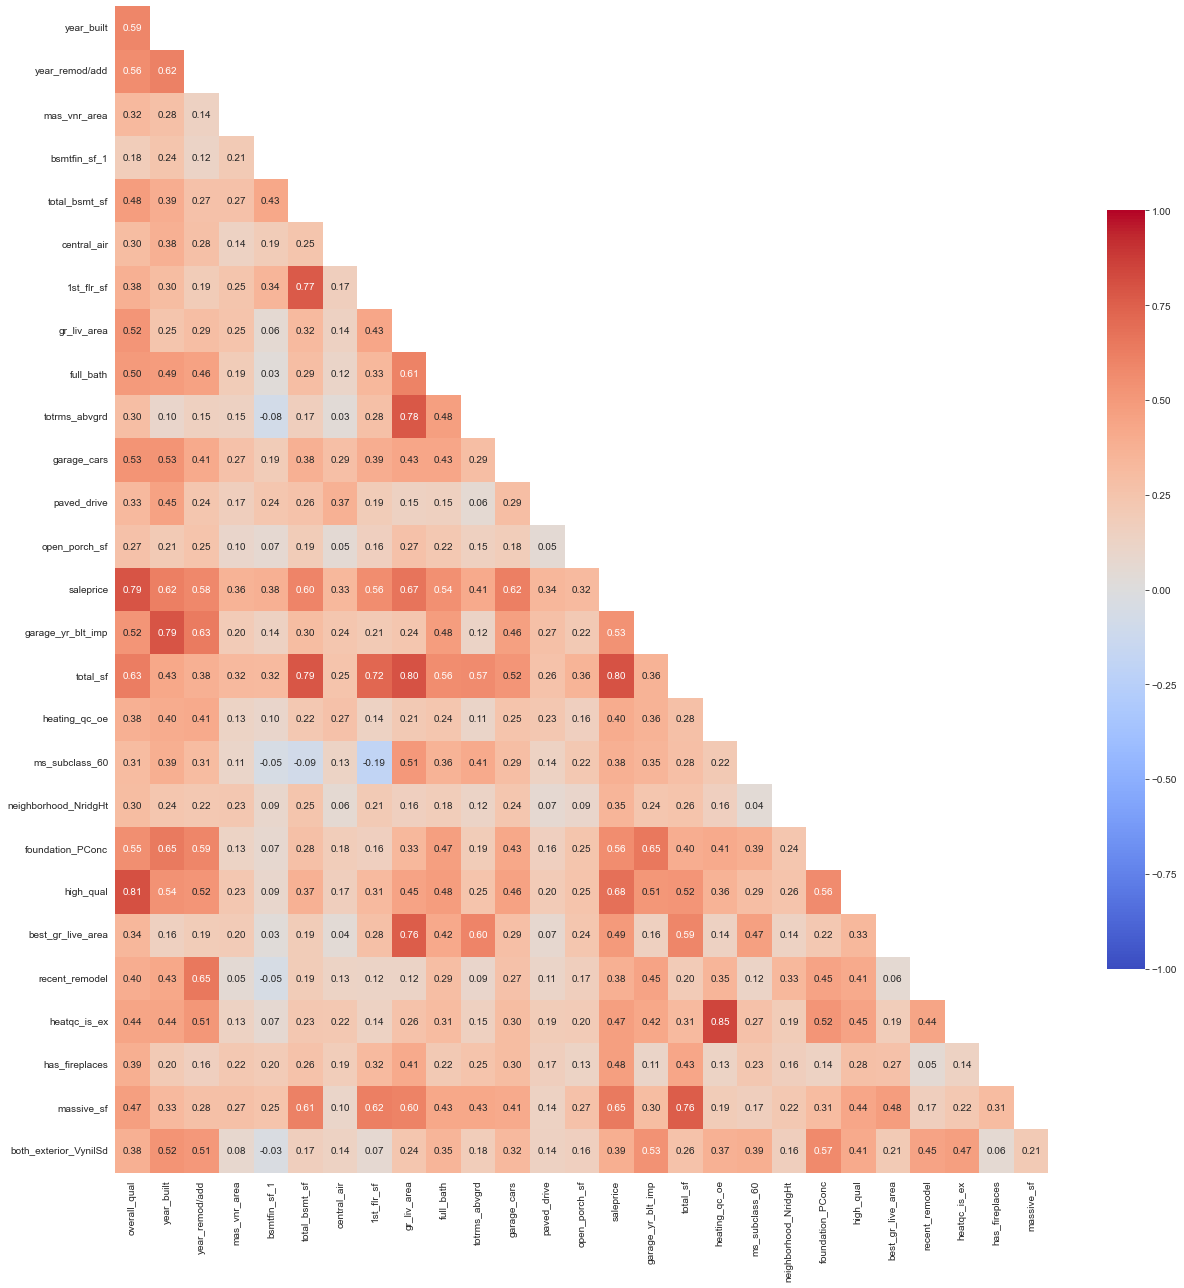

In [91]:
new_train_corr = new_train.corr()
mask = np.triu(np.ones_like(new_train_corr, dtype='bool'))
# adjust mask and df
mask = mask[1:, :-1]
corr = new_train_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .65})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
new_train.to_csv('../datasets/new_train.csv', index = False)

In [93]:
features = [col for col in new_train.columns if col != 'saleprice']
X = new_train[features]
y = new_train['saleprice']

In [94]:
X.describe()

overall_qual   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  \
count   1888.000000  1888.000000     1888.000000   1888.000000   1888.000000   
mean       5.945445  1969.960275     1982.838453     81.130297    406.479343   
std        1.305766    29.802494       21.139626    146.013502    404.360785   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1952.000000     1962.000000      0.000000      0.000000   
50%        6.000000  1971.000000     1990.000000      0.000000    348.500000   
75%        7.000000  1999.000000     2003.000000    130.000000    692.500000   
max       10.000000  2010.000000     2010.000000   1600.000000   1880.000000   

       total_bsmt_sf  central_air   1st_flr_sf  gr_liv_area    full_bath  \
count    1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean     1008.354873     0.925847  1115.935911  1419.923729     1.530191   
std       385.409373     0.262088   332.430638   396.892467     0.528107   
min         0.000000     0.000000   334.000000   334.000000     0.000000   
25%       780.000000     1.000000   866.000000  1107.750000     1.000000   
50%       970.000000     1.000000  1061.500000  1402.000000     2.000000   
75%      1246.250000     1.000000  1337.000000  1666.000000     2.000000   
max      3206.000000     1.000000  2524.000000  2538.000000     3.000000   

       totrms_abvgrd  garage_cars  paved_drive  open_porch_sf  \
count    1888.000000  1888.000000  1888.000000    1888.000000   
mean        6.253178     1.702860     0.902542      43.247881   
std         1.376420     0.728082     0.296658      61.529033   
min         2.000000     0.000000     0.000000       0.000000   
25%         5.000000     1.000000     1.000000       0.000000   
50%         6.000000     2.000000     1.000000      22.000000   
75%         7.000000     2.000000     1.000000      64.000000   
max        13.000000     5.000000     1.000000     523.000000   

       garage_yr_blt_imp     total_sf  heating_qc_oe  ms_subclass_60  \
count        1888.000000  1888.000000    1888.000000     1888.000000   
mean         1976.876059  2553.222458       3.254237        0.171610   
std            24.172615   691.681852       0.862566        0.377141   
min          1895.000000   334.000000       0.000000        0.000000   
25%          1960.750000  2049.500000       3.000000        0.000000   
50%          1977.000000  2512.000000       3.000000        0.000000   
75%          2000.000000  3018.000000       4.000000        0.000000   
max          2010.000000  5642.000000       4.000000        1.000000   

       neighborhood_NridgHt  foundation_PConc    high_qual  best_gr_live_area  \
count           1888.000000       1888.000000  1888.000000        1888.000000   
mean               0.040254          0.421610     0.340042           0.251059   
std                0.196607          0.493948     0.473849           0.433737   
min                0.000000          0.000000     0.000000           0.000000   
25%                0.000000          0.000000     0.000000           0.000000   
50%                0.000000          0.000000     0.000000           0.000000   
75%                0.000000          1.000000     1.000000           1.000000   
max                1.000000          1.000000     1.000000           1.000000   

       recent_remodel  heatqc_is_ex  has_fireplaces   massive_sf  \
count     1888.000000   1888.000000     1888.000000  1888.000000   
mean         0.267479      0.491525        0.479343     0.250530   
std          0.442761      0.500061        0.499705     0.433433   
min          0.000000      0.000000        0.000000     0.000000   
25%          0.000000      0.000000        0.000000     0.000000   
50%          0.000000      0.000000        0.000000     0.000000   
75%          1.000000      1.000000        1.000000     1.000000   
max          1.000000      1.000000        1.000000     1.000000   

       both_exterior_Vy

### Train Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .7, random_state=42)
linreg = LinearRegression()

In [96]:
print(f'Cross val score for training set:{cross_val_score(linreg, X_train, y_train).mean()}')
print(f'Cross val score for testing set:{cross_val_score(linreg, X_test, y_test).mean()}')


Cross val score for training set:0.8577643394423567
Cross val score for testing set:0.8595615539325323


The established baseline score for training & testing in this instance is at 85.77% & 85.59%.  The model is actually not overfit or underfit.  The good sign is that there is no significant drop between the train and test scores, which lends itself to generalizing to new data at about the same rate.

### Model Fitting & Evaluation

In [97]:
linreg.fit(X_train,y_train)
print(f'Training score is:{linreg.score(X_train, y_train)}.')
print(f'Testing score is:{linreg.score(X_test, y_test)}.')

      

Training score is:0.8658760622082375.
Testing score is:0.8724551538814946.


In [98]:
linreg.coef_
linreg_coef = set(zip(X.columns,linreg.coef_))
linreg_coef

{('1st_flr_sf', 19.713055609578717),
 ('best_gr_live_area', 3541.049819870342),
 ('both_exterior_VynilSd', -2311.9644860969506),
 ('bsmtfin_sf_1', 21.78792287685506),
 ('central_air', 6259.1015975122455),
 ('foundation_PConc', 3639.177923055946),
 ('full_bath', -5261.3729922696575),
 ('garage_cars', 6671.885618241774),
 ('garage_yr_blt_imp', 12.184368009640991),
 ('gr_liv_area', 24.9470557752173),
 ('has_fireplaces', 7620.696645543778),
 ('heating_qc_oe', -1681.608876207112),
 ('heatqc_is_ex', 8876.393612486067),
 ('high_qual', 5096.329199365407),
 ('mas_vnr_area', 5.1388292812964504),
 ('massive_sf', 11728.195203306577),
 ('ms_subclass_60', 12557.245914580993),
 ('neighborhood_NridgHt', 16857.712552147583),
 ('open_porch_sf', 11.637749731339525),
 ('overall_qual', 11718.366702034742),
 ('paved_drive', 1941.0374968710187),
 ('recent_remodel', 4048.0881312503166),
 ('total_bsmt_sf', -3.120313997003649),
 ('total_sf', 10.240060286596247),
 ('totrms_abvgrd', -2047.593806367313),
 ('year_b

In [99]:
coeff_features = pd.DataFrame(linreg_coef,
             columns = ['feature','coefficient']).sort_values(by='coefficient', ascending=False)

In [100]:
top_ten_coeff = coeff_features[:11]

In [101]:
coeff_features

feature   coefficient
7    neighborhood_NridgHt  16857.712552
13         ms_subclass_60  12557.245915
14             massive_sf  11728.195203
15           overall_qual  11718.366702
18           heatqc_is_ex   8876.393612
24         has_fireplaces   7620.696646
5             garage_cars   6671.885618
22            central_air   6259.101598
12              high_qual   5096.329199
4          recent_remodel   4048.088131
6        foundation_PConc   3639.177923
10      best_gr_live_area   3541.049820
26            paved_drive   1941.037497
0          year_remod/add    260.072244
23             year_built    105.744225
25            gr_liv_area     24.947056
1            bsmtfin_sf_1     21.787923
17             1st_flr_sf     19.713056
11      garage_yr_blt_imp     12.184368
8           open_porch_sf     11.637750
19               total_sf     10.240060
16           mas_vnr_area      5.138829
2           total_bsmt_sf     -3.120314
9           heating_qc_oe  -1681.608876
20          totrms_abvgrd  -2047.593806
21  both_exterior_VynilSd  -2311.964486
3               full_bath  -5261.372992

An example of interpreting this is: Holding all else constant, living in the neighborhood of Northridge Heights, increases value of home by $16,857.71.

In [102]:
top_ten_coeff.set_index(keys='feature',inplace = True)

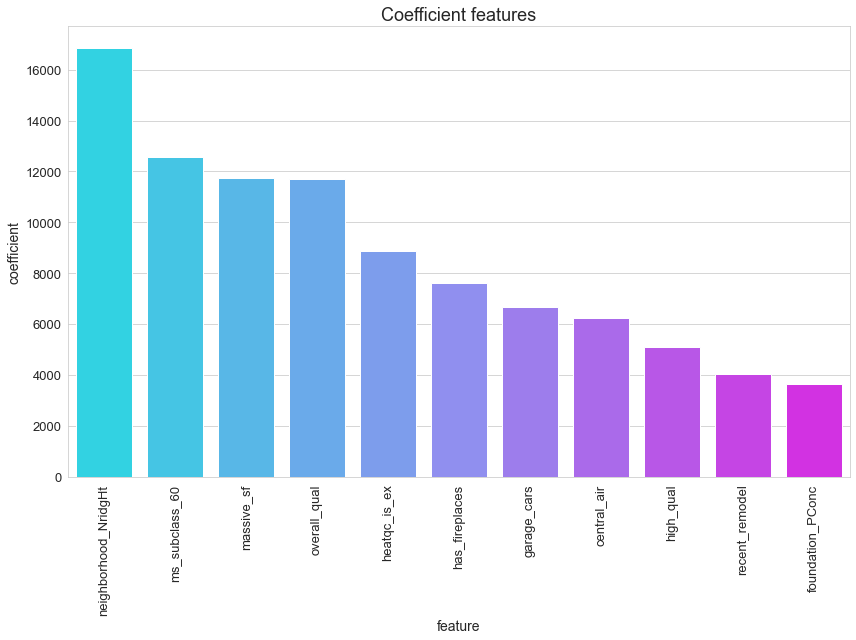

In [103]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = top_ten_coeff, x = top_ten_coeff.index, y = 'coefficient', palette='cool')
plt.tight_layout();


Top ten features based on their coefficients.
* Living in the neighborhood of Northridge heights.
* 2 story dwelling 1946 & newer
* Having massive square footage in the 75th percentile and above.
* Overall quality.
* Whether the heat quality is considered excellent or not.
* Whether the place has a fireplace or not.
* How many Garage Cars.
* Whether the place have central air or not.
* Whether the place is considered of high quality or not.  
* Whether the home is a more recent model.
* Whether the home has a foundation of concrete. 

### Predictions

In [104]:
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

In [105]:
def run_metrics(ytrain, trainPreds, ytest,testPreds):
    '''
    function aims to run relevant metrics needed to evaluate a prediction model
    '''
    mse_train = metrics.mean_squared_error(ytrain, trainPreds)
    mse_test =metrics.mean_squared_error(ytest, testPreds)
    rmse_train = metrics.mean_squared_error(ytrain, trainPreds, squared=False)
    rmse_test = metrics.mean_squared_error(ytest, testPreds, squared = False)
    r2_train = metrics.r2_score(ytrain,trainPreds)
    r2_test = metrics.r2_score(ytest,testPreds)
    adj_r2 = 1-(1-metrics.r2_score(y_test, test_preds)*(len(y_test-1)/(len(y_test)-len(features)-1)))
    print (f'The training MSE is {mse_train}, while the testing MSE is {mse_test}')
    print(f'The training RMSE is {rmse_train}, while the testing RMSE is {rmse_test}')
    print(f'R2 train score: {round(r2_train, 2)}, while R2 test score: {round(r2_test,2)}')
    print(f'Adj R2: {round(adj_r2,2)}')


    

In [106]:
run_metrics(y_train, train_preds, y_test, test_preds)

The training MSE is 454556326.22466004, while the testing MSE is 426113318.2440627
The training RMSE is 21320.326597513933, while the testing RMSE is 20642.512401451106
R2 train score: 0.87, while R2 test score: 0.87
Adj R2: 0.92


This model already works alot better than any of the initial sets of models I worked on a couple of months back.  I can attribute the improvement of just this baseline model to three factors. The way I dealt with null values was to use a combination of iterative imputation & simple imputation.  Dealing with outliers on my target feature by using a formal statistical method(interquartile range method). Another difference is in how I approached ordinal columns, where the values actually had a certain weight difference to them(e.g. excellent, good, bad), where I used an ordinal encoder to transform these columns.  If you compare the original results I used for my baseline model long ago where the Testing R2 Score is .65, this model has a whopping 22 point improvement.  The adjusted R2 also lets me know that the model can afford to add more features which determines how I iterate from here. 

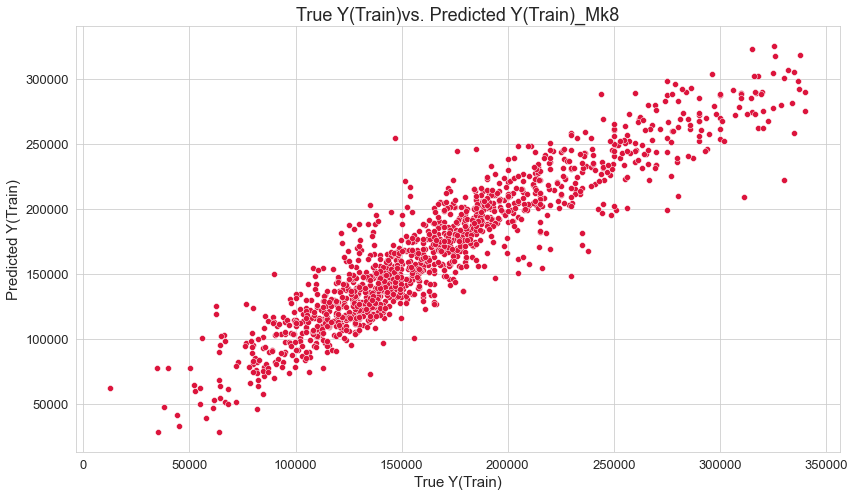

In [162]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)_Mk8',fontdict={'fontsize':18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= linreg,x=y_train, y=train_preds, color='crimson');
plt.tight_layout()

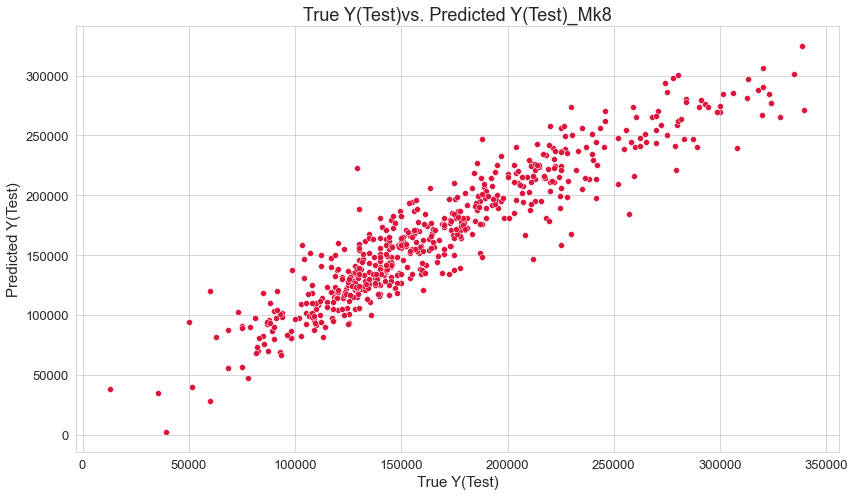

In [163]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)_Mk8',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13, rotation = 0)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= linreg,x=y_test, y=test_preds, color='crimson');
plt.tight_layout()

In [109]:
ada = AdaBoostRegressor()

In [110]:
cross_val_score(ada,X_train,y_train).mean(), cross_val_score(ada,X_test,y_test).mean()

(0.8291050324488729, 0.8165179505522108)

In [111]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [112]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.8645496623831309, 0.8409352959363792)

In [113]:
set(zip(X.columns, ada.feature_importances_))

{('1st_flr_sf', 0.03181231645548156),
 ('best_gr_live_area', 0.0),
 ('both_exterior_VynilSd', 0.02152871177914463),
 ('bsmtfin_sf_1', 0.06964909810096913),
 ('central_air', 0.0052195588997264696),
 ('foundation_PConc', 0.01754506760764969),
 ('full_bath', 0.00010461160747488088),
 ('garage_cars', 0.006211269411260474),
 ('garage_yr_blt_imp', 0.003236214159204752),
 ('gr_liv_area', 0.04065323251254427),
 ('has_fireplaces', 0.014357661632802535),
 ('heating_qc_oe', 0.0031846430390249027),
 ('heatqc_is_ex', 0.013733716887787425),
 ('high_qual', 0.04996123328824418),
 ('mas_vnr_area', 0.02577533482434271),
 ('massive_sf', 0.0),
 ('ms_subclass_60', 0.0),
 ('neighborhood_NridgHt', 0.01642878391489712),
 ('open_porch_sf', 0.03636266617136555),
 ('overall_qual', 0.19702153826710656),
 ('paved_drive', 0.003431488678576696),
 ('recent_remodel', 0.0),
 ('total_bsmt_sf', 0.018423859767877013),
 ('total_sf', 0.2794244968956389),
 ('totrms_abvgrd', 0.005215655830138874),
 ('year_built', 0.0432475829

### Optimize the workflow for linear regressions

In [114]:
def corr_col_names(data, col, corr_num):
    '''
    This function looks to streamline picking those columns that are over a certain
    correlation threshold and returning a new dataframe with those columns. 
    data is dataframe
    col is column and should be in string format
    corr_num is correlation and should be a float.
    '''
    corr_df = data.corr()[[col]] > (corr_num)
    corr_col_list = corr_df[corr_df[col]==True].index
    corr_col_list = [col for col in corr_col_list]
    new_train_data = pd.DataFrame(data, columns=corr_col_list)
    return new_train_data

In [115]:
def X_y_features(data):
    '''
    input dataframe for the purposes of setting up your X & y.
    features will be columns that are not saleprice
    X includes the dataframes with those features
    y is the target which is saleprice.
    '''
    features = [col for col in data.columns if col != 'saleprice']
    X = data[features]
    y = data['saleprice']
    return X, y, features

def train_test(X,y):
    '''
    X should be data[features] from previous function X_y_features()
    y is the target resulting from function: X_y_features()
    Set up a train test split with a train size of .7, random state = 42
    Returns your X_train....to y_test
    '''

    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .7, random_state=42)
    return X_train, X_test, y_train, y_test

def instantiate_lr():
    linreg = LinearRegression()
    return linreg

def cross_val_scores(linreg, X_train,y_train, X_test, y_test):
    '''
    linreg should be linear regression object
    X_train.....y_test should be their corresponding values from train test split
    Allows you to see cross val scores in order to establish a baseline. 
    '''
    print(f'Cross val score for training set:{cross_val_score(linreg, X_train, y_train).mean()}')
    print(f'Cross val score for testing set:{cross_val_score(linreg, X_test, y_test).mean()}')


def fit_linreg(linreg, X_train,y_train, X_test, y_test):
    '''
    linreg should be linear regression object
    X_train.....y_test should be their corresponding values from train test split
    Fit the linear regression object and obtain/print the training and testing scores
    '''
    linreg.fit(X_train,y_train)
    print(f'Training score is:{linreg.score(X_train, y_train)}.')
    print(f'Testing score is:{linreg.score(X_test, y_test)}.')
    return linreg

def linreg_coefunct(linreg, X):    
    '''
    linreg = Linear regression object
    X should be dataframe with just features
    Get the top ten coefficients as a result of the linear regression
    Create a dataframe with the corresponding column
    '''
    linreg_coef_dict = set(zip(X.columns,linreg.coef_))
    linreg_coef_df = pd.DataFrame(linreg_coef_dict, 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False)
    top_ten_coeff = linreg_coef_df[:11]
    top_ten_coeff.set_index(keys='feature',inplace = True)
    return linreg_coef_df, top_ten_coeff

def lin_reg_predict(linreg, X_train, X_test):
    '''
    Use linear regression object along with X_train, X_test in order to get predictions
    returns the actual predictions
    '''
    train_preds = linreg.predict(X_train)
    test_preds = linreg.predict(X_test)
    return train_preds, test_preds


In [116]:
def scatterplot_actual_preds(linreg,y_actual,y_preds,color):
    '''
    Scatterplot of actual y train versus predicted y train
    linreg is Linear regression object
    y_train is correspoinding y_train
    train_preds is corresponding predicted y train
    color is string corresponds to matplotlib coloring system
    '''
    plt.figure(figsize = (12,7))
    plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 18})
    plt.xlabel('True Y(Train)', fontdict={'fontsize': 13})
    plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 13})
    sns.scatterplot(data= linreg,x=y_actual, y=y_preds, color= color);
    plt.tight_layout()
    return plt.show()

### Linear regression using features with over .25 Correlation

In [117]:
# run the workflow
new_train_25=corr_col_names(train,'saleprice',.25)
X_25,y_25,features_25 = X_y_features(new_train_25)
X_train_25, X_test_25, y_train_25, y_test_25 = train_test(X_25,y_25)
lr_25 = instantiate_lr()
cross_val_scores(lr_25, X_train_25, y_train_25, X_test_25, y_test_25)
lr_25 = fit_linreg(lr_25, X_train_25, y_train_25, X_test_25, y_test_25)
lr_25_coef, lr_25_coef_topten = linreg_coefunct(lr_25, X_25)
train_preds_25, test_preds_25 = lin_reg_predict(lr_25, X_train_25,X_test_25)

Cross val score for training set:0.8695219379585494
Cross val score for testing set:0.871378465761131
Training score is:0.8794099989823032.
Testing score is:0.8809990907170373.


In [118]:
# get metrics
run_metrics(y_train_25, train_preds_25, y_test_25, test_preds_25)

The training MSE is 408688775.05771285, while the testing MSE is 397568963.9510005
The training RMSE is 20216.05241034245, while the testing RMSE is 19939.13147433961
R2 train score: 0.88, while R2 test score: 0.88
Adj R2: 0.92


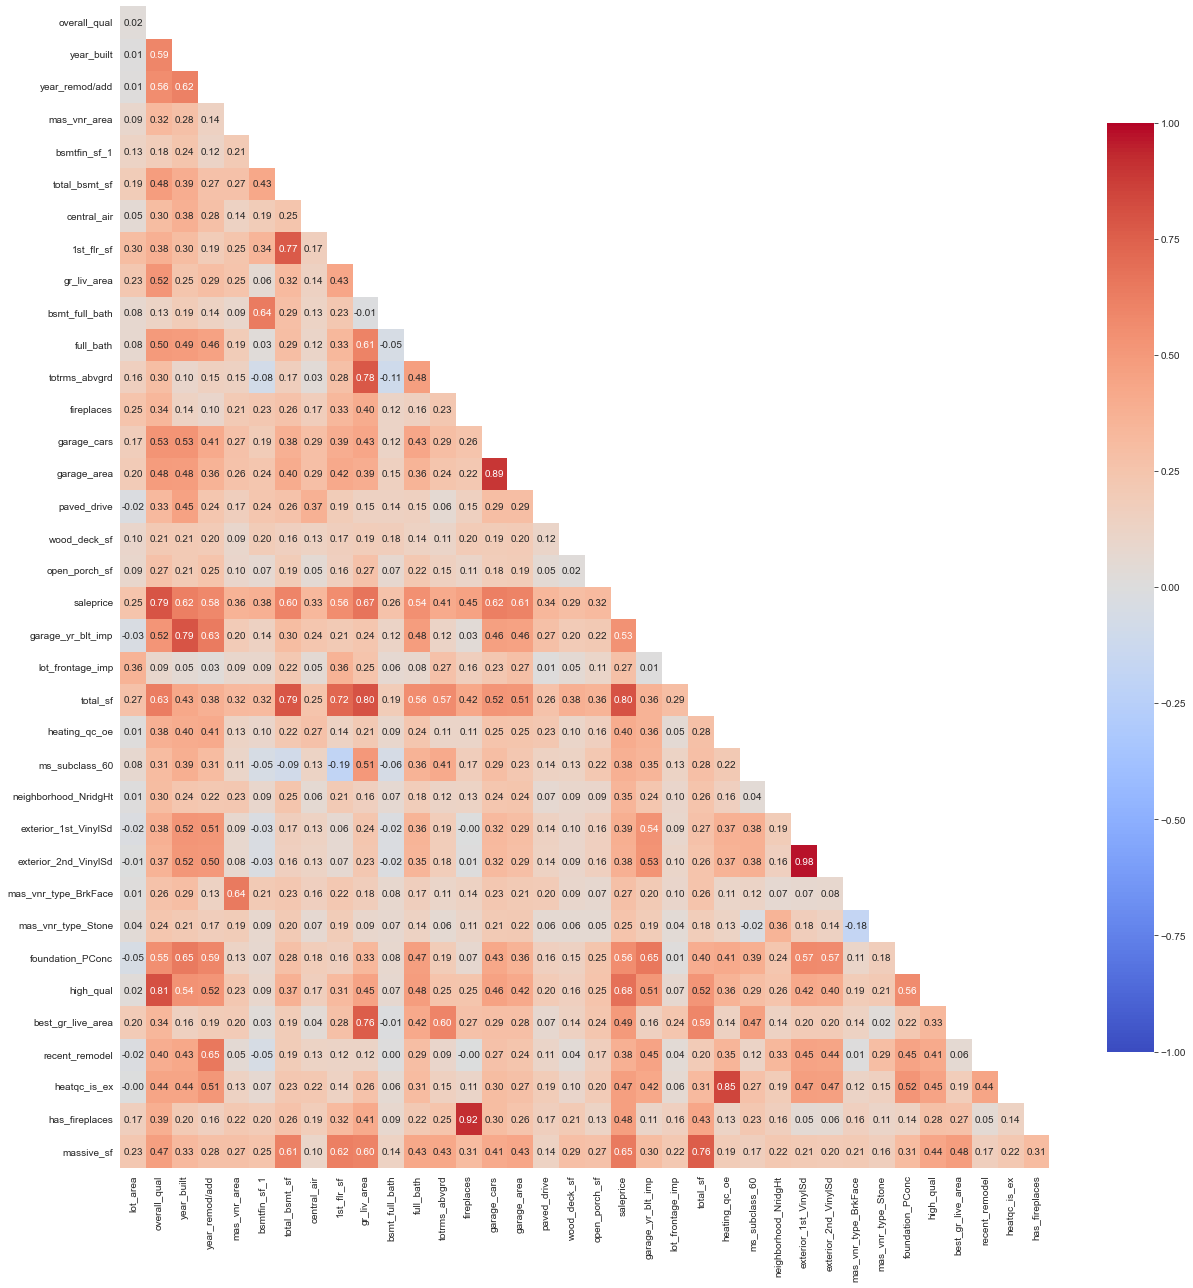

In [119]:
# look at correlations between features
new_train_25_corr = new_train_25.corr()
mask_25 = np.triu(np.ones_like(new_train_25_corr, dtype='bool'))
# adjust mask and df
mask_25 = mask_25[1:, :-1]
corr_25 = new_train_25_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr_25, mask=mask_25, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

For this next iteration of the model I will keep both exterior vinyl features and see if it harms the model or improves the model.

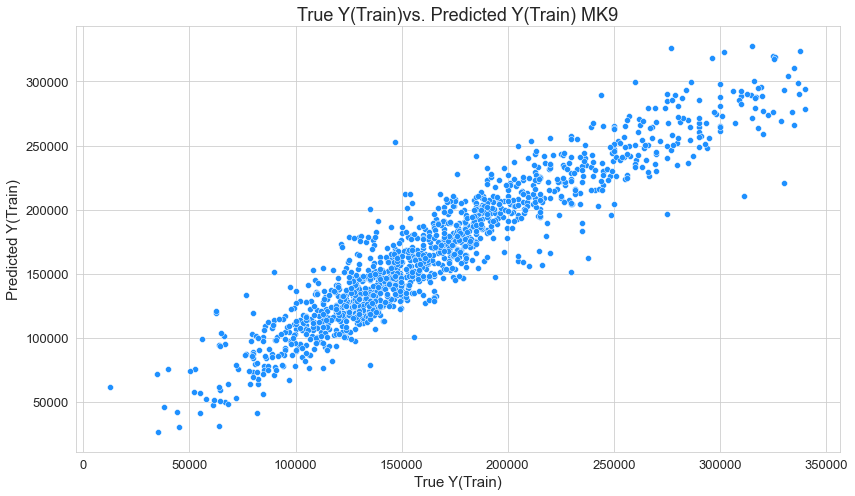

In [164]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) MK9',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13, rotation = 0)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_25,x=y_train_25, y=train_preds_25, color='dodgerblue');
plt.tight_layout()

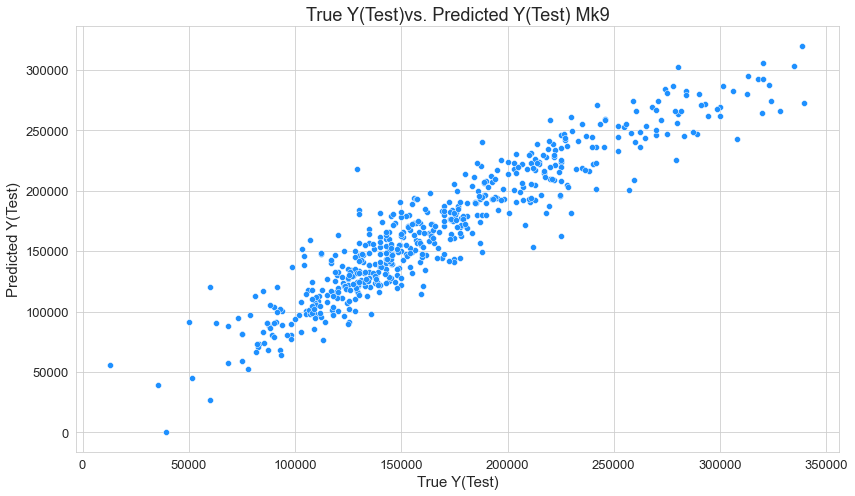

In [165]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk9',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize= 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize= 13)
sns.scatterplot(data= lr_25,x=y_test_25, y=test_preds_25, color='dodgerblue');
plt.tight_layout()

In [122]:
lr_25_coef_topten

coefficient
feature                           
neighborhood_NridgHt  17993.042652
exterior_2nd_VinylSd  12866.797108
overall_qual          12694.415137
massive_sf            11447.378307
heatqc_is_ex           9538.739488
ms_subclass_60         6748.541374
fireplaces             6390.292904
foundation_PConc       5358.924486
central_air            5339.997267
high_qual              5130.355526
bsmt_full_bath         3575.050495

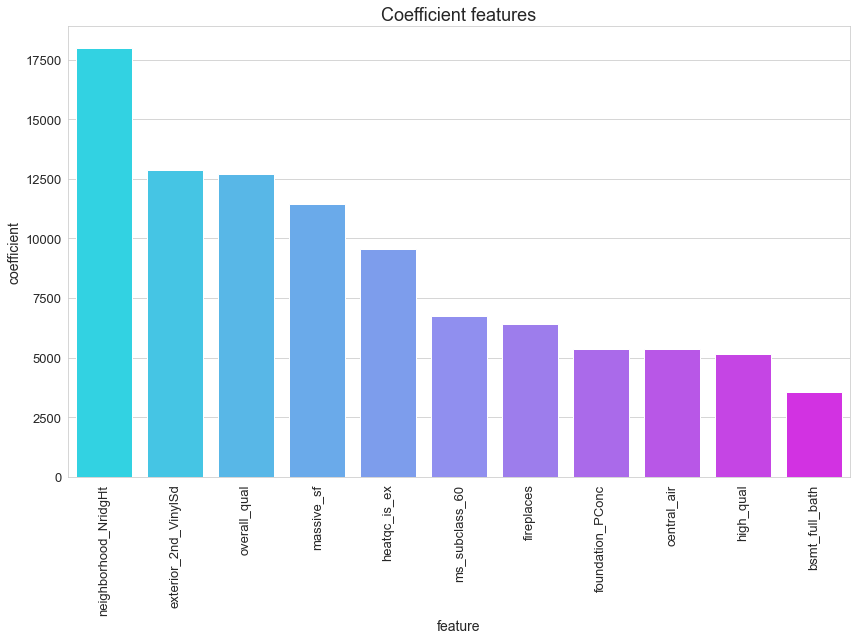

In [123]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_25_coef_topten, x = lr_25_coef_topten.index, y = 'coefficient', palette='cool')
plt.tight_layout();


### Include features with correlation over .20

In [124]:
new_train_20=corr_col_names(train,'saleprice',.20)
X_20,y_20,features_20 = X_y_features(new_train_20)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test(X_20,y_20)
lr_20 = instantiate_lr()
cross_val_scores(lr_20, X_train_20, y_train_20, X_test_20, y_test_20)
lr_20 = fit_linreg(lr_20, X_train_20, y_train_20, X_test_20, y_test_20)
lr_20_coef, lr_20_coef_topten = linreg_coefunct(lr_20, X_20)
train_preds_20, test_preds_20 = lin_reg_predict(lr_20, X_train_20,X_test_20)

Cross val score for training set:0.8738018539035888
Cross val score for testing set:0.8730375511708413
Training score is:0.8862580476337094.
Testing score is:0.881522229031799.


In [125]:
run_metrics(y_train_20, train_preds_20, y_test_20, test_preds_20)

The training MSE is 385480212.23111373, while the testing MSE is 395821216.3156579
The training RMSE is 19633.649997672714, while the testing RMSE is 19895.256125912478
R2 train score: 0.89, while R2 test score: 0.88
Adj R2: 0.92


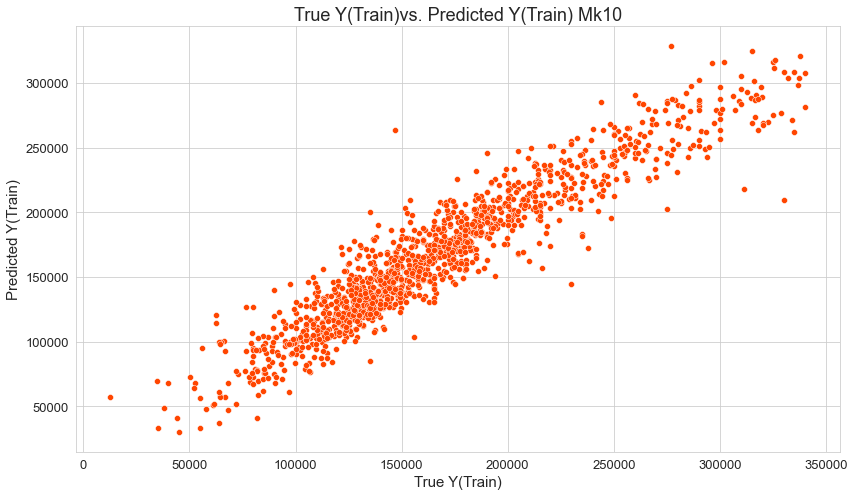

In [166]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) Mk10',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_20,x=y_train_20, y=train_preds_20, color='orangered');
plt.tight_layout()

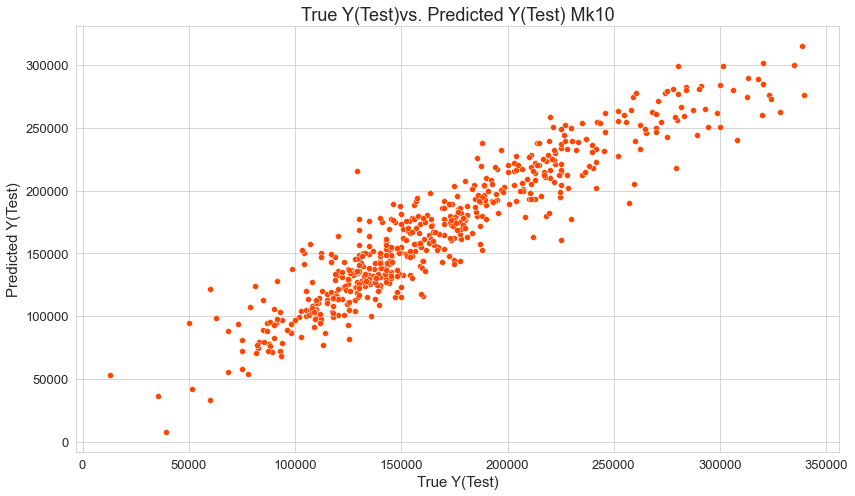

In [167]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk10',fontsize = 18)
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize =13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_20,x=y_test_20, y=test_preds_20, color='orangered');
plt.tight_layout()

In [128]:
lr_20_coef_topten

coefficient
feature                           
neighborhood_NridgHt  23644.083621
neighborhood_NoRidge  18984.129731
neighborhood_Somerst  17600.921348
exterior_2nd_VinylSd  13159.357997
overall_qual          12452.901807
ms_subclass_60        11578.741147
massive_sf            10821.820507
heatqc_is_ex           9376.403976
ms_zoning_RL           7404.760947
fireplaces             7334.727564
central_air            5586.470206

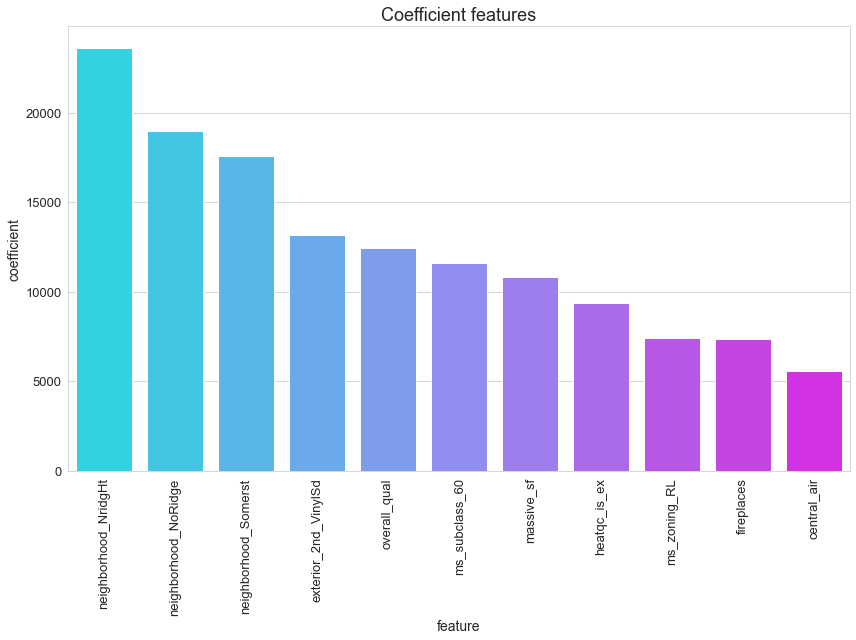

In [129]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_20_coef_topten, x = lr_20_coef_topten.index, y = 'coefficient', palette='cool')
plt.tight_layout();


### Include features with correlation over .15

In [130]:
new_train_15=corr_col_names(train,'saleprice',.15)
X_15,y_15,features_15 = X_y_features(new_train_15)
X_train_15, X_test_15, y_train_15, y_test_15 = train_test(X_15,y_15)
lr_15 = instantiate_lr()
cross_val_scores(lr_15, X_train_15, y_train_15, X_test_15, y_test_15)
lr_15 = fit_linreg(lr_15, X_train_15, y_train_15, X_test_15, y_test_15)
lr_15_coef, lr_15_coef_topten = linreg_coefunct(lr_15, X_15)
train_preds_15, test_preds_15 = lin_reg_predict(lr_15, X_train_15,X_test_15)

Cross val score for training set:0.8751006167732873
Cross val score for testing set:0.8820493585948421
Training score is:0.889109620324739.
Testing score is:0.8896938976192078.


In [131]:
run_metrics(y_train_15, train_preds_15, y_test_15, test_preds_15)

The training MSE is 375816013.373417, while the testing MSE is 368520569.3405835
The training RMSE is 19385.974656266757, while the testing RMSE is 19196.889574631186
R2 train score: 0.89, while R2 test score: 0.89
Adj R2: 0.92


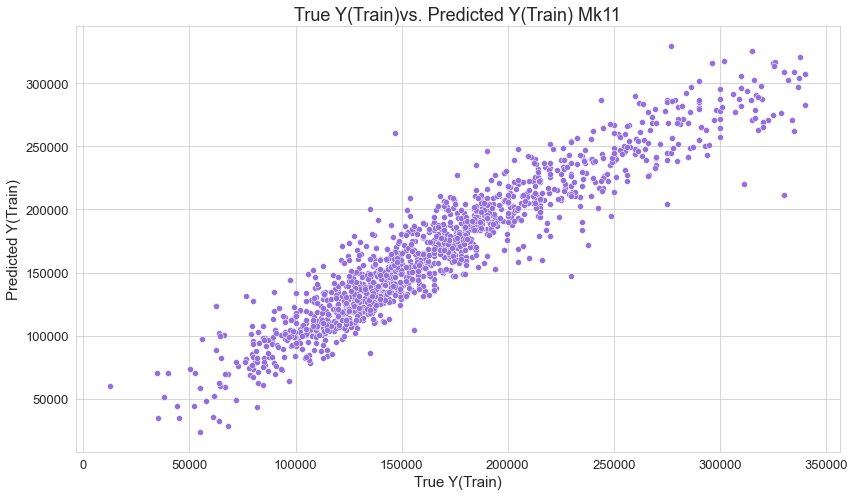

In [168]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) Mk11',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_15,x=y_train_15, y=train_preds_15, color='mediumpurple');
plt.tight_layout()

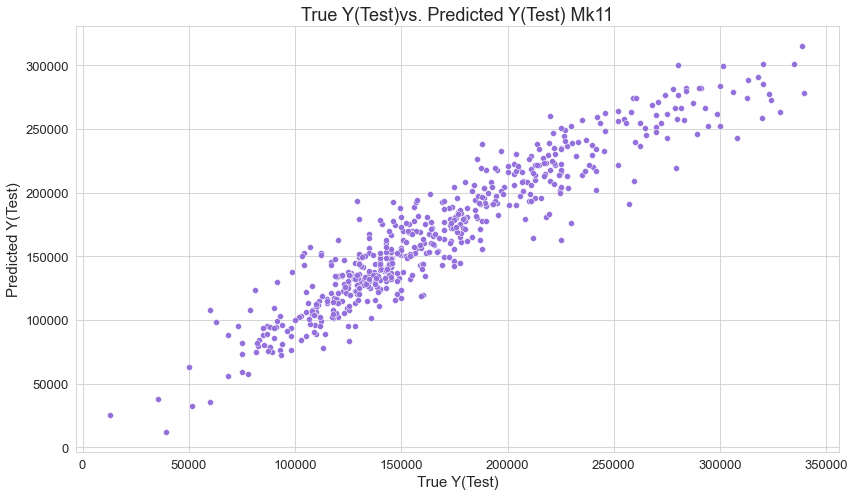

In [170]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk11',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_15,x=y_test_15, y=test_preds_15, color='mediumpurple');
plt.tight_layout()

### Include features with correlation over .10

In [134]:
new_train_10=corr_col_names(train,'saleprice',.10)
X_10,y_10,features_10 = X_y_features(new_train_10)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test(X_10,y_10)
lr_10 = instantiate_lr()
cross_val_scores(lr_10, X_train_10, y_train_10, X_test_10, y_test_10)
lr_10 = fit_linreg(lr_10, X_train_10, y_train_10, X_test_10, y_test_10)
lr_10_coef, lr_10_coef_topten = linreg_coefunct(lr_10, X_10)
train_preds_10, test_preds_10 = lin_reg_predict(lr_10, X_train_10,X_test_10)

Cross val score for training set:0.8813555795638701
Cross val score for testing set:0.8832731025758666
Training score is:0.8970117035200044.
Testing score is:0.8990994472202851.


In [135]:
run_metrics(y_train_10, train_preds_10, y_test_10, test_preds_10)

The training MSE is 349035246.52523345, while the testing MSE is 337097661.4584381
The training RMSE is 18682.4850200725, while the testing RMSE is 18360.219537315945
R2 train score: 0.9, while R2 test score: 0.9
Adj R2: 0.92


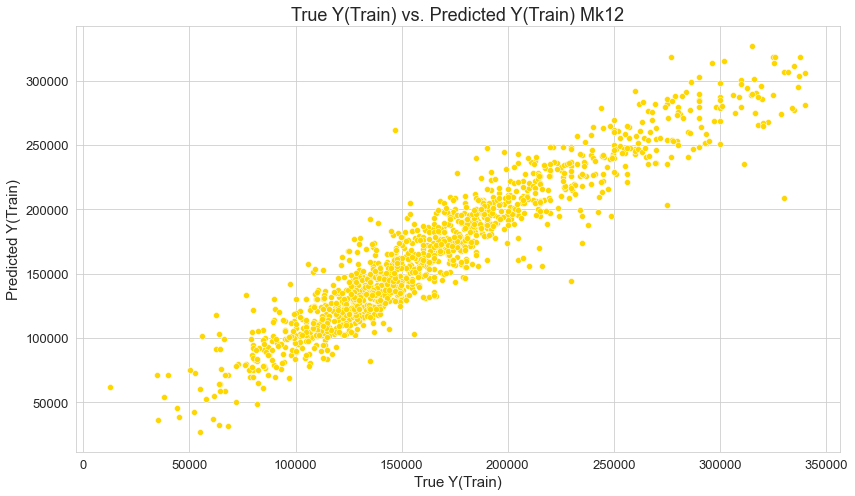

In [171]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train) vs. Predicted Y(Train) Mk12',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_10,x=y_train_10, y=train_preds_10, color='gold');
plt.tight_layout()

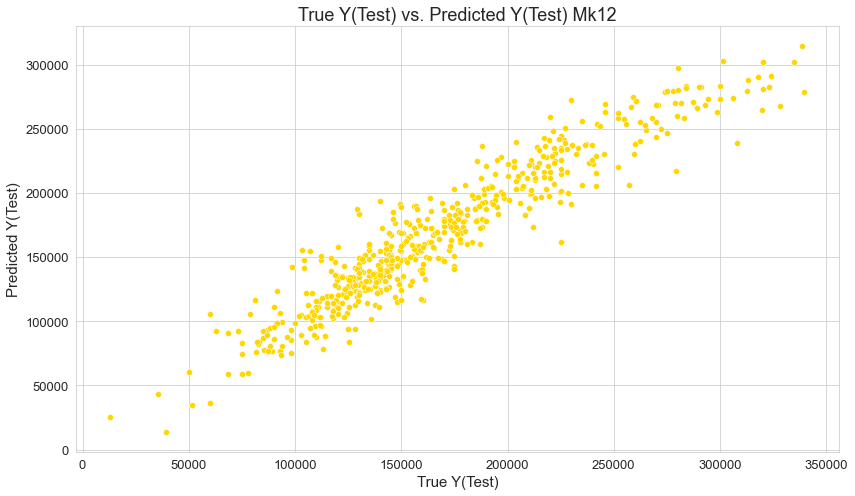

In [172]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test) vs. Predicted Y(Test) Mk12',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_10,x=y_test_10, y=test_preds_10, color='gold');
plt.tight_layout()

In [138]:
lr_10_coef_topten

coefficient
feature                           
neighborhood_NridgHt  27177.191015
neighborhood_Crawfor  24658.404353
neighborhood_Veenker  24587.413591
neighborhood_NoRidge  22359.262291
neighborhood_Somerst  17638.228997
exterior_2nd_VinylSd  14218.834193
neighborhood_StoneBr  13783.278742
ms_subclass_60        13122.838906
overall_qual          11022.368578
massive_sf             9897.461598
heatqc_is_ex           8547.570706

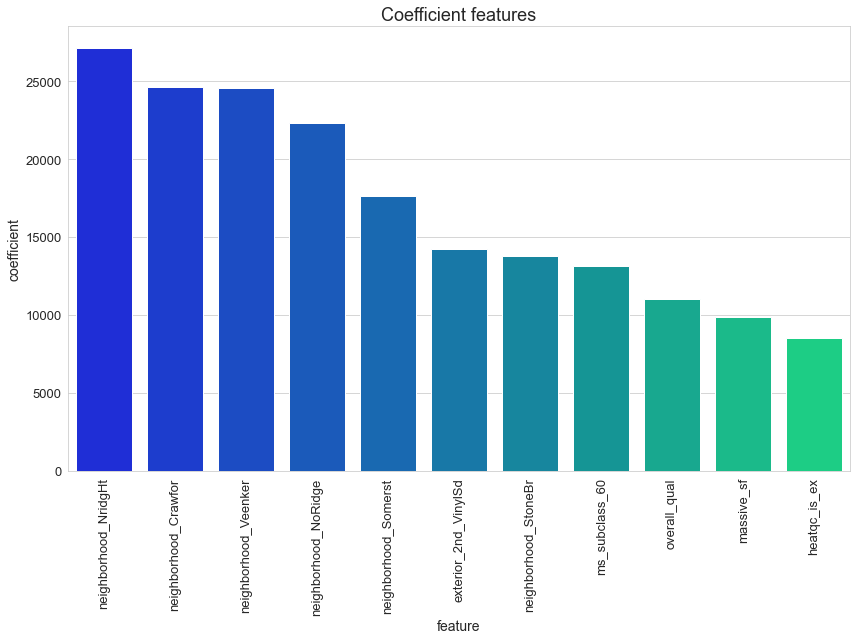

In [139]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_10_coef_topten, x = lr_10_coef_topten.index, y = 'coefficient', palette='winter')
plt.tight_layout();


### Include features with correlation over .05

In [140]:
new_train_05=corr_col_names(train,'saleprice',.05)
X_05,y_05,features_05 = X_y_features(new_train_05)
X_train_05, X_test_05, y_train_05, y_test_05 = train_test(X_05,y_05)
lr_05 = instantiate_lr()
cross_val_scores(lr_05, X_train_05, y_train_05, X_test_05, y_test_05)
lr_05 = fit_linreg(lr_05, X_train_05, y_train_05, X_test_05, y_test_05)
lr_05_coef, lr_05_coef_topten = linreg_coefunct(lr_05, X_05)
train_preds_05, test_preds_05 = lin_reg_predict(lr_05, X_train_05,X_test_05)
run_metrics(y_train_05, train_preds_05, y_test_05, test_preds_05)

Cross val score for training set:0.8883966813277624
Cross val score for testing set:0.8812125426202551
Training score is:0.9049906552014937.
Testing score is:0.89869308678888.
The training MSE is 321993966.47354805, while the testing MSE is 338455267.0152178
The training RMSE is 17944.190326496988, while the testing RMSE is 18397.15377484294
R2 train score: 0.9, while R2 test score: 0.9
Adj R2: 0.92


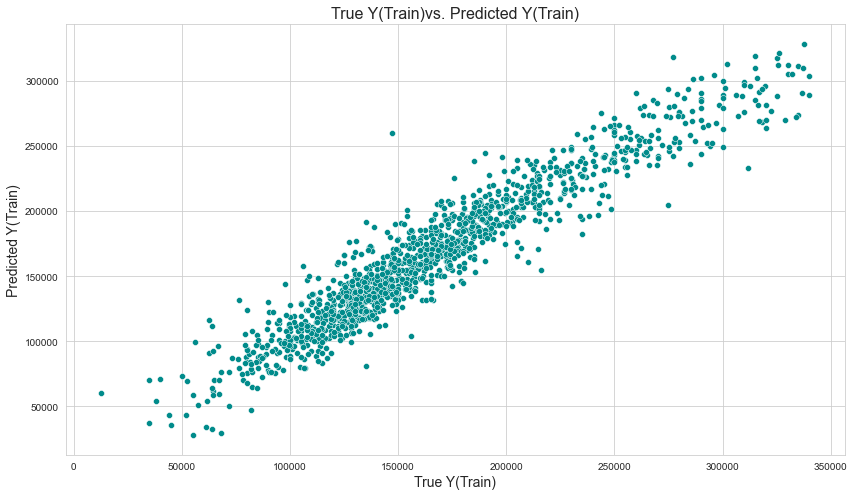

In [141]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) Mk13',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_05,x=y_train_05, y=train_preds_05, color='darkcyan');
plt.tight_layout()

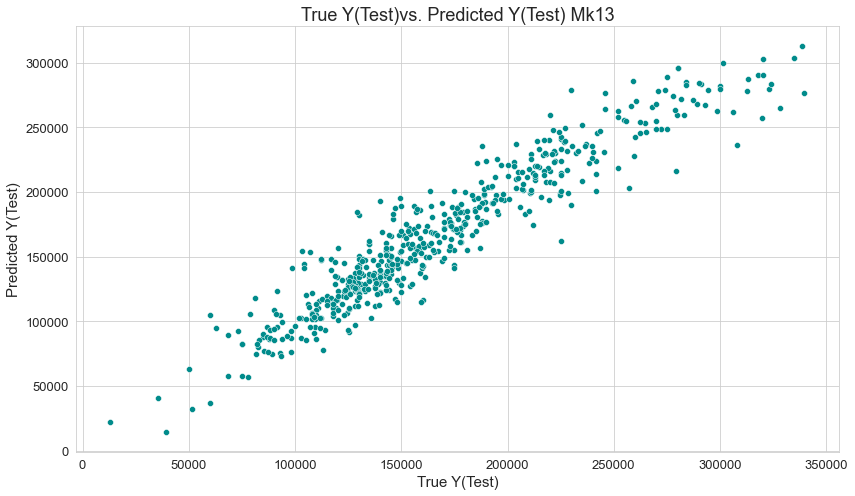

In [173]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk13',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_05,x=y_test_05, y=test_preds_05, color='darkcyan');
plt.tight_layout()

### Including features greater than -.10

In [185]:
new_train_10neg=corr_col_names(train,'saleprice',-.10)
X_10neg,y_10neg,features_10neg = X_y_features(new_train_10neg)
X_train_10neg, X_test_10neg, y_train_10neg, y_test_10neg = train_test(X_10neg,y_10neg)
lr_10neg = instantiate_lr()
cross_val_scores(lr_10neg, X_train_10neg, y_train_10neg, X_test_10neg, y_test_10neg)
lr_10neg = fit_linreg(lr_10neg, X_train_10neg, y_train_10neg, X_test_10neg, y_test_10neg)
lr_10neg_coef, lr_10neg_coef_topten = linreg_coefunct(lr_10neg, X_10neg)
train_preds_10neg, test_preds_10neg = lin_reg_predict(lr_10neg, X_train_10neg,X_test_10neg)
run_metrics(y_train_10neg, train_preds_10neg, y_test_10neg, test_preds_10neg)

Cross val score for training set:0.8917525022577226
Cross val score for testing set:0.8837833958346486
Training score is:0.9175580152971763.
Testing score is:0.9031896837114409.
The training MSE is 279402217.90510803, while the testing MSE is 323432630.7128604
The training RMSE is 16715.328830301485, while the testing RMSE is 17984.232836372543
R2 train score: 0.92, while R2 test score: 0.9
Adj R2: 0.92


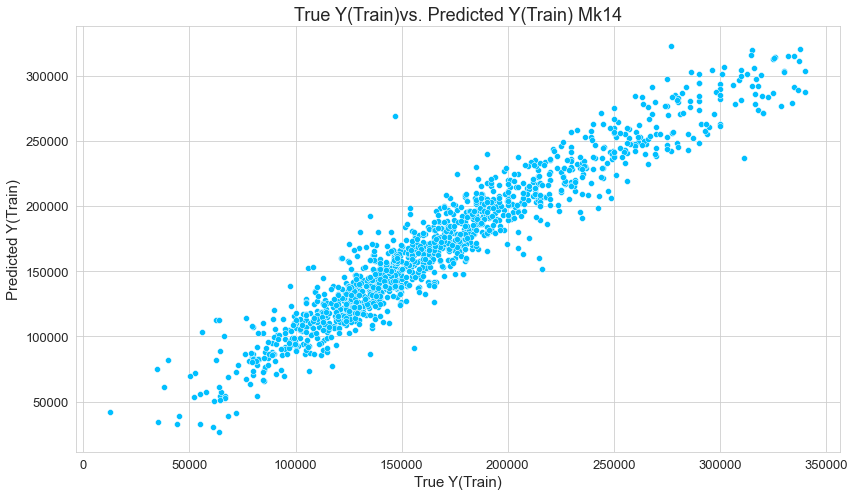

In [195]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) Mk14',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data=lr_10neg, x=y_train_10neg, y=train_preds_10neg, color='deepskyblue');
plt.tight_layout()

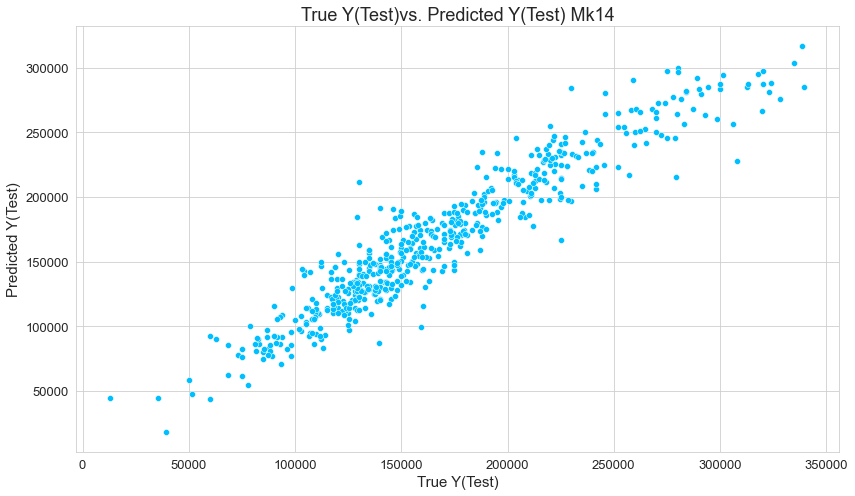

In [198]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk14',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_10neg,x=y_test_10neg, y=test_preds_10neg, color='deepskyblue');
plt.tight_layout()

In [186]:
lr_10neg_coef_topten

coefficient
feature                            
neighborhood_GrnHill  102503.320378
neighborhood_NridgHt   30243.253877
exterior_1st_Stone     26330.171572
neighborhood_NoRidge   26121.814429
neighborhood_Veenker   23702.573793
ms_subclass_70         21992.115718
neighborhood_Crawfor   21173.306295
ms_subclass_60         20511.615767
neighborhood_Somerst   20116.074366
exterior_2nd_Brk Cmn   18002.224645
exterior_1st_BrkFace   17896.376162

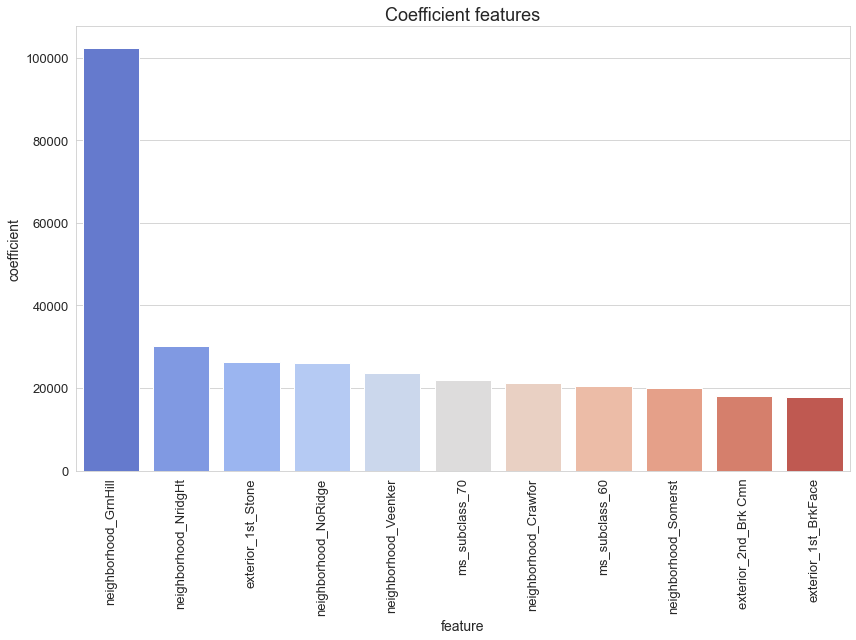

In [204]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_10neg_coef_topten, x = lr_10neg_coef_topten.index, y = 'coefficient', palette='coolwarm')
plt.tight_layout();

### Include features with correlation over -.25

In [189]:
new_train_25neg=corr_col_names(train,'saleprice',-.25)
X_25neg,y_25neg,features_25neg = X_y_features(new_train_25neg)
X_train_25neg, X_test_25neg, y_train_25neg, y_test_25neg = train_test(X_25neg,y_25neg)
lr_25neg = instantiate_lr()
cross_val_scores(lr_25neg, X_train_25neg, y_train_25neg, X_test_25neg, y_test_25neg)
lr_25neg = fit_linreg(lr_25neg, X_train_25neg, y_train_25neg, X_test_25neg, y_test_25neg)
lr_25neg_coef, lr_25neg_coef_topten = linreg_coefunct(lr_25neg, X_25neg)
train_preds_25neg, test_preds_25neg = lin_reg_predict(lr_25neg, X_train_25neg,X_test_25neg)
run_metrics(y_train_25neg, train_preds_25neg, y_test_25neg, test_preds_25neg)

Cross val score for training set:0.8969309500427816
Cross val score for testing set:0.8814998750853483
Training score is:0.9270930035769384.
Testing score is:0.902719723583061.
The training MSE is 247087410.31443766, while the testing MSE is 325002715.8698908
The training RMSE is 15719.01429207435, while the testing RMSE is 18027.831701840652
R2 train score: 0.93, while R2 test score: 0.9
Adj R2: 0.92


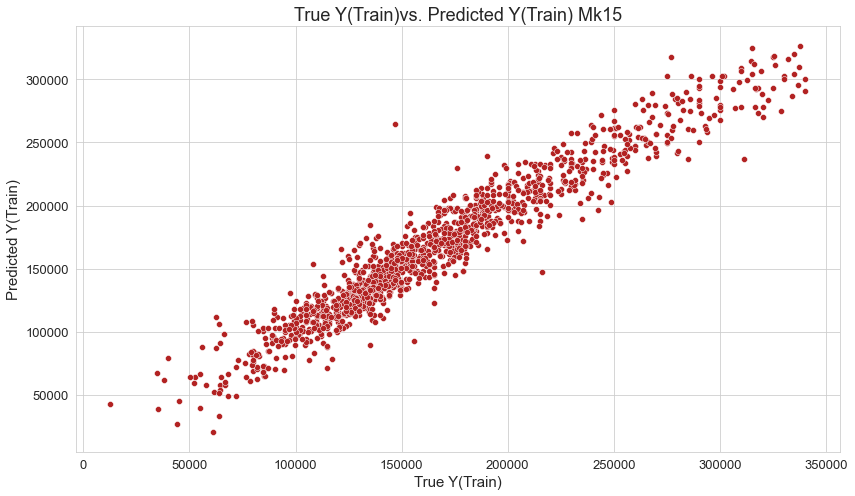

In [202]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train) Mk15',fontdict={'fontsize': 18})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data=lr_25neg, x=y_train_25neg, y=train_preds_25neg, color='firebrick');
plt.tight_layout()

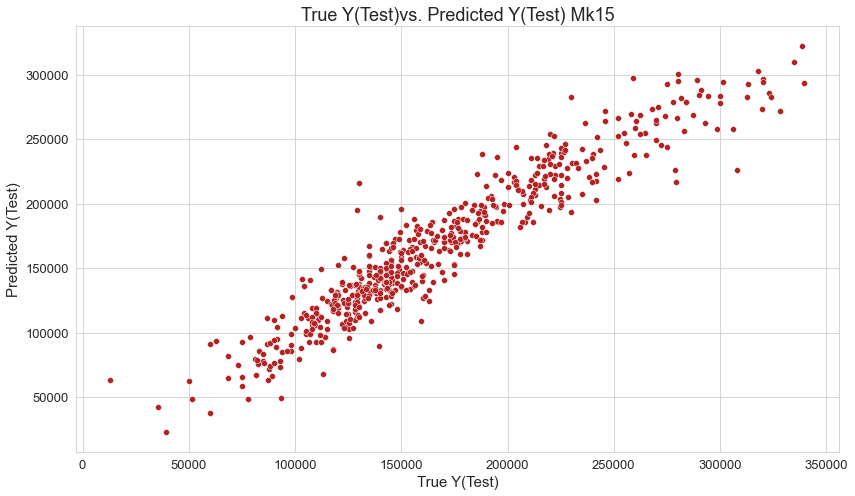

In [203]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test) Mk15',fontdict={'fontsize': 18})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 15})
plt.xticks(fontsize = 13)
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 15})
plt.yticks(fontsize = 13)
sns.scatterplot(data= lr_25neg,x=y_test_25neg, y=test_preds_25neg, color='firebrick');
plt.tight_layout()

In [191]:
lr_25neg_coef_topten

coefficient
feature                           
neighborhood_GrnHill  99974.936893
exterior_2nd_Brk Cmn  29701.146766
neighborhood_BrDale   24484.756336
neighborhood_NoRidge  23076.665246
neighborhood_NridgHt  22760.815453
exterior_2nd_AsphShn  21981.002844
ms_zoning_FV          19082.552709
exterior_2nd_VinylSd  17224.188847
ms_zoning_RL          16872.442085
neighborhood_Veenker  15639.467108
house_style_2.5Unf    15416.708691

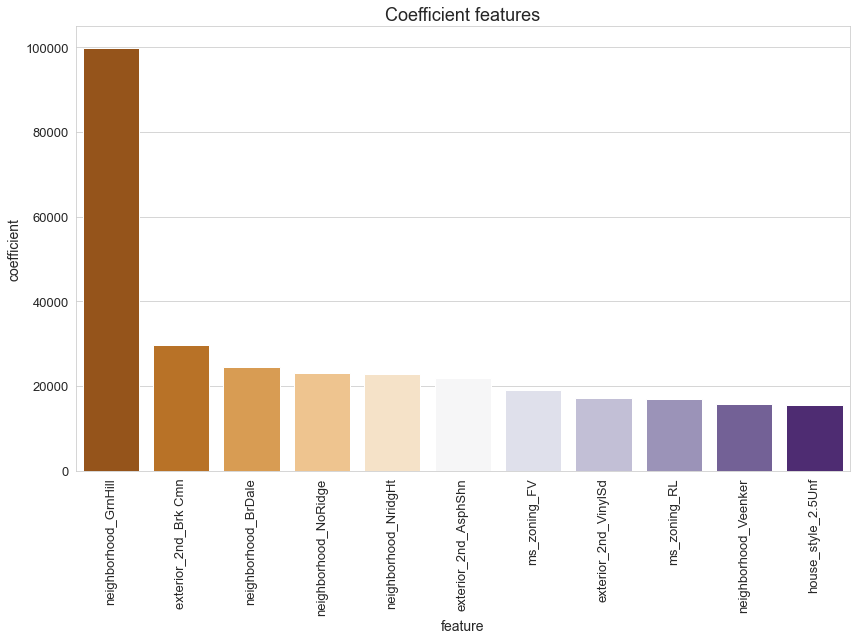

In [207]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_25neg_coef_topten, x = lr_25neg_coef_topten.index, y = 'coefficient', palette='PuOr')
plt.tight_layout();

## Conclusion

The purpose of revisiting this project via models 8-15 is to show more thoughtfulness in a few areas to see how that impacts our linear regression models:
* Dealing with outliers
* Dealing with Nulls
* Processing the data 
* Feature Selection
* Having a DRY approach 

### Dealing with Outliers
Used a statistical approach in dealing with outliers for the target variable Salesprice. Anything that is 1.5 greater than the Interquartile range and then adding or subtracting that amount from the 75th and 25th percentile would be considered the cut off points.  

### Dealing with Nulls
During the first two notebooks my approach entailed simply dropping nulls, for columns with close to or over 50% nulls I would just drop the column.  Remaining columns with a null presence of about 5% had those rows simply dropped.  This time around I had the same approach where I dropped those columns that had about 50% nulls or higher, but the remaining null values were dealt with differently.  For numerical columns I decided to go with the experimental iterative imputer, and for any other data type went with a simple imputer approach(most frequent).  This allowed for me to have more fleshed out data points, and wanted to see how these changes would impact the model. 

### Processing the Data

When processing the data I wanted to really familiarize myself with the features, and noticed how I had not taken into account all the ordinal feature columns.  I decided to transform these columns using ordinal encoding.
While maintaing the variables(paved drive & central air) I had made into binary propositions from my original project work. I was also looking to apply get dummies to the remaining categorical features that were of the nominal variety. 
Also I feature engineered by choosing columns with a high correlation and creating a new column to see whether the value was greater than or equal to the 75th percentile or not.  

### DRY Approach
Another thing I wanted to optimize was the actual workflow and using functions and list comprehensions in order to accomplish repetitive tasks such as when executing my imputing approach, in implementing/fitting a model and running metrics for that model.

|              **Model**             | **Train MSE** | **Test MSE** | **Train RMSE** | **Test RMSE** | **Train R2** | **Test R2** | **Adjusted R2** |
|:----------------------------------:|:-------------:|:------------:|:--------------:|:-------------:|:------------:|:-----------:|:---------------:|
|   Base_line Cross validation mean  |       NA      |      NA      |       NA       |       NA      |      .80     |     .65     |                 |
|  Model_8 Correlated features > .3  |  454556326.22 | 426113318.24 |    21320.33    |    20642.51   |      .87     |     .87     |       .92       |
|  Model_9 Correlated features > .25 |  408688775.06 | 397568963.95 |    20216.05    |    19939.13   |      .88     |     .88     |       .92       |
| Model_10 Correlated features > .20 |  385480212.23 | 395821216.32 |    19633.65    |    19895.26   |      .89     |     .88     |       .92       |
| Model_11 Correlated features > .15 |  375816013.37 | 368520569.34 |    19385.97    |    19196.89   |      .89     |     .89     |       .92       |
| Model_12 Correlated features > .10 |  349035246.53 | 337097661.46 |    18682.49    |    18360.22   |      .9      |      .9     |       .92       |
| Model_13 Correlated features > .05 |  321993966.47 | 338455267.02 |    17944.19    |    18397.15   |      .9      |      .9     |       .92       |
|  Model_14 Correlated features >-10 |  279402217.91 |**323432630.71**|  16715.33    |  **17984.23** |      .92     |    **.9**   |       .92       |
|  Model_15 Correlated features >-25 |  247087410.31 | 325002715.87 |    15719.01    |    18027.83   |      .93     |      .9     |       .92       |

Initially the results from model 8 which only included features with a correlation of over .3, surpassed anything I did in the first 7 models.  Some key take aways were an improvement to 87% for the testing R2 Score, and being able to halve my testing RMSE from model 1(43,739.88 to 20,642.51).  An additional metric I wanted to evaluate with was the adjusted R2, this is because the fact that the Adjust R2 value was higher than my testing R2 indicating that my models would work well by adding additional features.  This dictated the rest of my approach which peaks with model 14 which not only achieves the highest testing R2 score of .9 but also has the lowest RMSE of 17,984.23. Due to the differences in dealing with nulls, actually dealing with outliers, and processing the data allowed for my features to become more useful in building a model.  There was no need to use polynomial features and because my models were at a good bias variance level, there was no need for regularization either.  When you take into account the initial approach and having a baseline from the cross validation mean for testing at .65, being able to improve the model by 25 points to .9 is substantial.  Also when comparing it to the best performing model from the first batch which had a testing R2 score of .83 there is also a 7 point improvement in performance with this latest iteration.  
